# Mengimpor modul yang dibutuhkan
Pertama, kita perlu mengimpor beberapa modul Python yang akan kita gunakan untuk menganalisis data kita. Kita akan menggunakan `pandas` untuk manipulasi data, `numpy` untuk operasi numerik, `fancyimpute` untuk mengisi data yang hilang, dan beberapa modul khusus dari folder `MyModule` yang berisi fungsi-fungsi bermanfaat untuk analisis statistik, plotting, penghapusan outlier, dan imputasi data.

```py
import pandas as pd
import numpy as np
from fancyimpute import  IterativeImputer

import sys
sys.path.append('../../MyModule/')
from StatAnalyzer import StatAnalyzer
from MissingDataPlotter import MissingDataPlotter
from OutlierRemover import OutlierRemover
from FeaturePlotter import FeaturePlotter
from DataImputer import DataImputer
```

Dengan mengimpor modul-modul ini, kita dapat menggunakan fungsi-fungsi yang mereka sediakan dengan mudah. Misalnya, kita dapat membuat dataframe pandas dengan `pd.DataFrame()`, menghitung mean numpy dengan `np.mean()`, atau membuat plot missing data dengan `MissingDataPlotter.plot()`.

In [8]:
import sys
sys.path.append('../../MainCustomModules/')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import  IterativeImputer

In [11]:
from StatAnalyzer import StatAnalyzer
from MissingDataPlotter import MissingDataPlotter
from OutlierRemover import OutlierRemover
from FeaturePlotter import FeaturePlotter
from DataImputer import DataImputer

# Membaca data penguin dari file CSV
Selanjutnya, kita akan membaca data penguin yang tersimpan dalam file CSV (comma-separated values) dengan menggunakan fungsi `pd.read_csv()`. File CSV adalah format file yang umum digunakan untuk menyimpan dan berbagi data tabular, seperti spreadsheet atau database. File CSV yang kita gunakan berisi data tentang ukuran dan jenis penguin dari tiga spesies berbeda: Adelie, Chinstrap, dan Gentoo. Data ini dikumpulkan oleh Palmer Station Long Term Ecological Research Program.

```
df = pd.read_csv('./dataset/penguins_lter.csv')
df[:5]
```

Dengan menggunakan `df[:5]`, kita dapat melihat lima baris pertama dari dataframe `df` yang kita buat. Dataframe adalah struktur data dua dimensi yang mirip dengan tabel, yang memiliki baris dan kolom. Setiap baris mewakili satu pengamatan atau sampel, dan setiap kolom mewakili satu variabel atau fitur. Dataframe pandas memungkinkan kita untuk melakukan berbagai operasi pada data, seperti menghitung statistik deskriptif, mengelompokkan data berdasarkan kriteria tertentu, menggabungkan data dari sumber yang berbeda, dan lainnya.

In [15]:
df = pd.read_csv('./Assets/Datasets/penguins_lter.csv')

## Menganalisis data penguin

In [14]:
sa = StatAnalyzer()
sa.table_diagnose(df, 'Species', trimmed_tol=0.1)

rows  columns  number  object  datetime  timedelta  category  \
Count     2        1       0       1         0          0         0   

       datetimetz  
Count           0

columns n null n unique   types  \
0  version https://git-lfs.github.com/spec/v1      0        2  object   

                                         unique vals percentages null (%)  \
0  [oid sha256:5e625602cdd94c54167b0684c864a11ff9...                  0.0   

  skewness  std  min Q1 (25%) mean trimmed mean meadian (Q2) Q3 (75%)  max  \
0      NaN  NaN  NaN      NaN  NaN          NaN          NaN      NaN  NaN   

  IQR (< lower) IQR (> upper) outliers (%)  \
0           NaN           NaN          NaN   

                                                mode  
0  oid sha256:5e625602cdd94c54167b0684c864a11ff9d...

In [6]:
df['Date Egg'] = pd.to_datetime(df['Date Egg'], format='%m/%d/%y')
df['Days'] = df['Date Egg'].dt.strftime('%A')
df['Months'] = df['Date Egg'].dt.strftime('%B')
df['Years'] = df['Date Egg'].dt.year
df[['N values', 'A values']] = df['Individual ID'].str.extract(r'(N\d+)(A\d+)')
df.drop(columns=['Individual ID'], inplace=True)

In [7]:
sa.table_diagnose(df, 'Species', trimmed_tol=0.1)

rows  columns  number  object  datetime  timedelta  category   
Count   344       21       8      12         1          0         0  \

       datetimetz  
Count           0

columns n null n unique           types   
0             studyName      0        3          object  \
1         Sample Number      0      152           int64   
2               Species      0        3          object   
3                Region      0        1          object   
4                Island      0        3          object   
5                 Stage      0        1          object   
6     Clutch Completion      0        2          object   
7              Date Egg      0       50  datetime64[ns]   
8    Culmen Length (mm)      2      164         float64   
9     Culmen Depth (mm)      2       80         float64   
10  Flipper Length (mm)      2       55         float64   
11        Body Mass (g)      2       94         float64   
12                  Sex     10        3          object   
13    Delta 15 N (o/oo)     14      330         float64   
14    Delta 13 C (o/oo)     13      331         float64   
15             Comments    318        7          object   
16                 Days      0        7          object   
17               Months      0        2          object   
18                Years      0        3           int32   
19             N values      0       95          object   
20             A values      0        2          object   

                                          unique vals percentages null (%)   
0                         [PAL0708, PAL0809, PAL0910]                  0.0  \
1                                                 NaN                  0.0   
2   [Adelie Penguin (Pygoscelis adeliae), Chinstra...                  0.0   
3                                            [Anvers]                  0.0   
4                          [Torgersen, Biscoe, Dream]                  0.0   
5                                [Adult, 1 Egg Stage]                  0.0   
6                                           [Yes, No]                  0.0   
7                                                 NaN                  0.0   
8                                                 NaN             0.581395   
9                                                 NaN             0.581395   
10                                                NaN             0.581395   
11                                                NaN             0.581395   
12                             [MALE, FEMALE, nan, .]             2.906977   
13                                                NaN             4.069767   
14                                                NaN              3.77907   
15  [Not enough blood for isotopes., nan, Adult no...             92.44186   
16  [Sunday, Friday, Thursday, Monday, Saturday, T...                  0.0   
17                               [November, December]                  0.0   
18                                 [2007, 2008, 2009]                  0.0   
19                                                NaN                  0.0   
20                                           [A1, A2]                  0.0   

    skewness                          std                  min   
0        NaN                          NaN                  NaN  \
1   0.351402                    40.430199                    1   
2        NaN                          NaN                  NaN   
3        NaN                          NaN                  NaN   
4        NaN                          NaN                  NaN   
5        NaN                          NaN                  NaN   
6        NaN                          NaN                  NaN   
7        NaN  298 days 19:50:44.783416800  2007-11-09 00:00:00   
8   0.053118                     5.459584                 32.1   
9  -0.143465                     1.974793                 13.1   
10  0.345682                    14.061714                172.0   
11  0.470329                   801.954536               2700.0   
12       NaN                          NaN                  NaN   
13  0.238981                      0.55177               7.6322   
14  0.3377

In [8]:
fp = FeaturePlotter()

<Figure size 640x480 with 0 Axes>

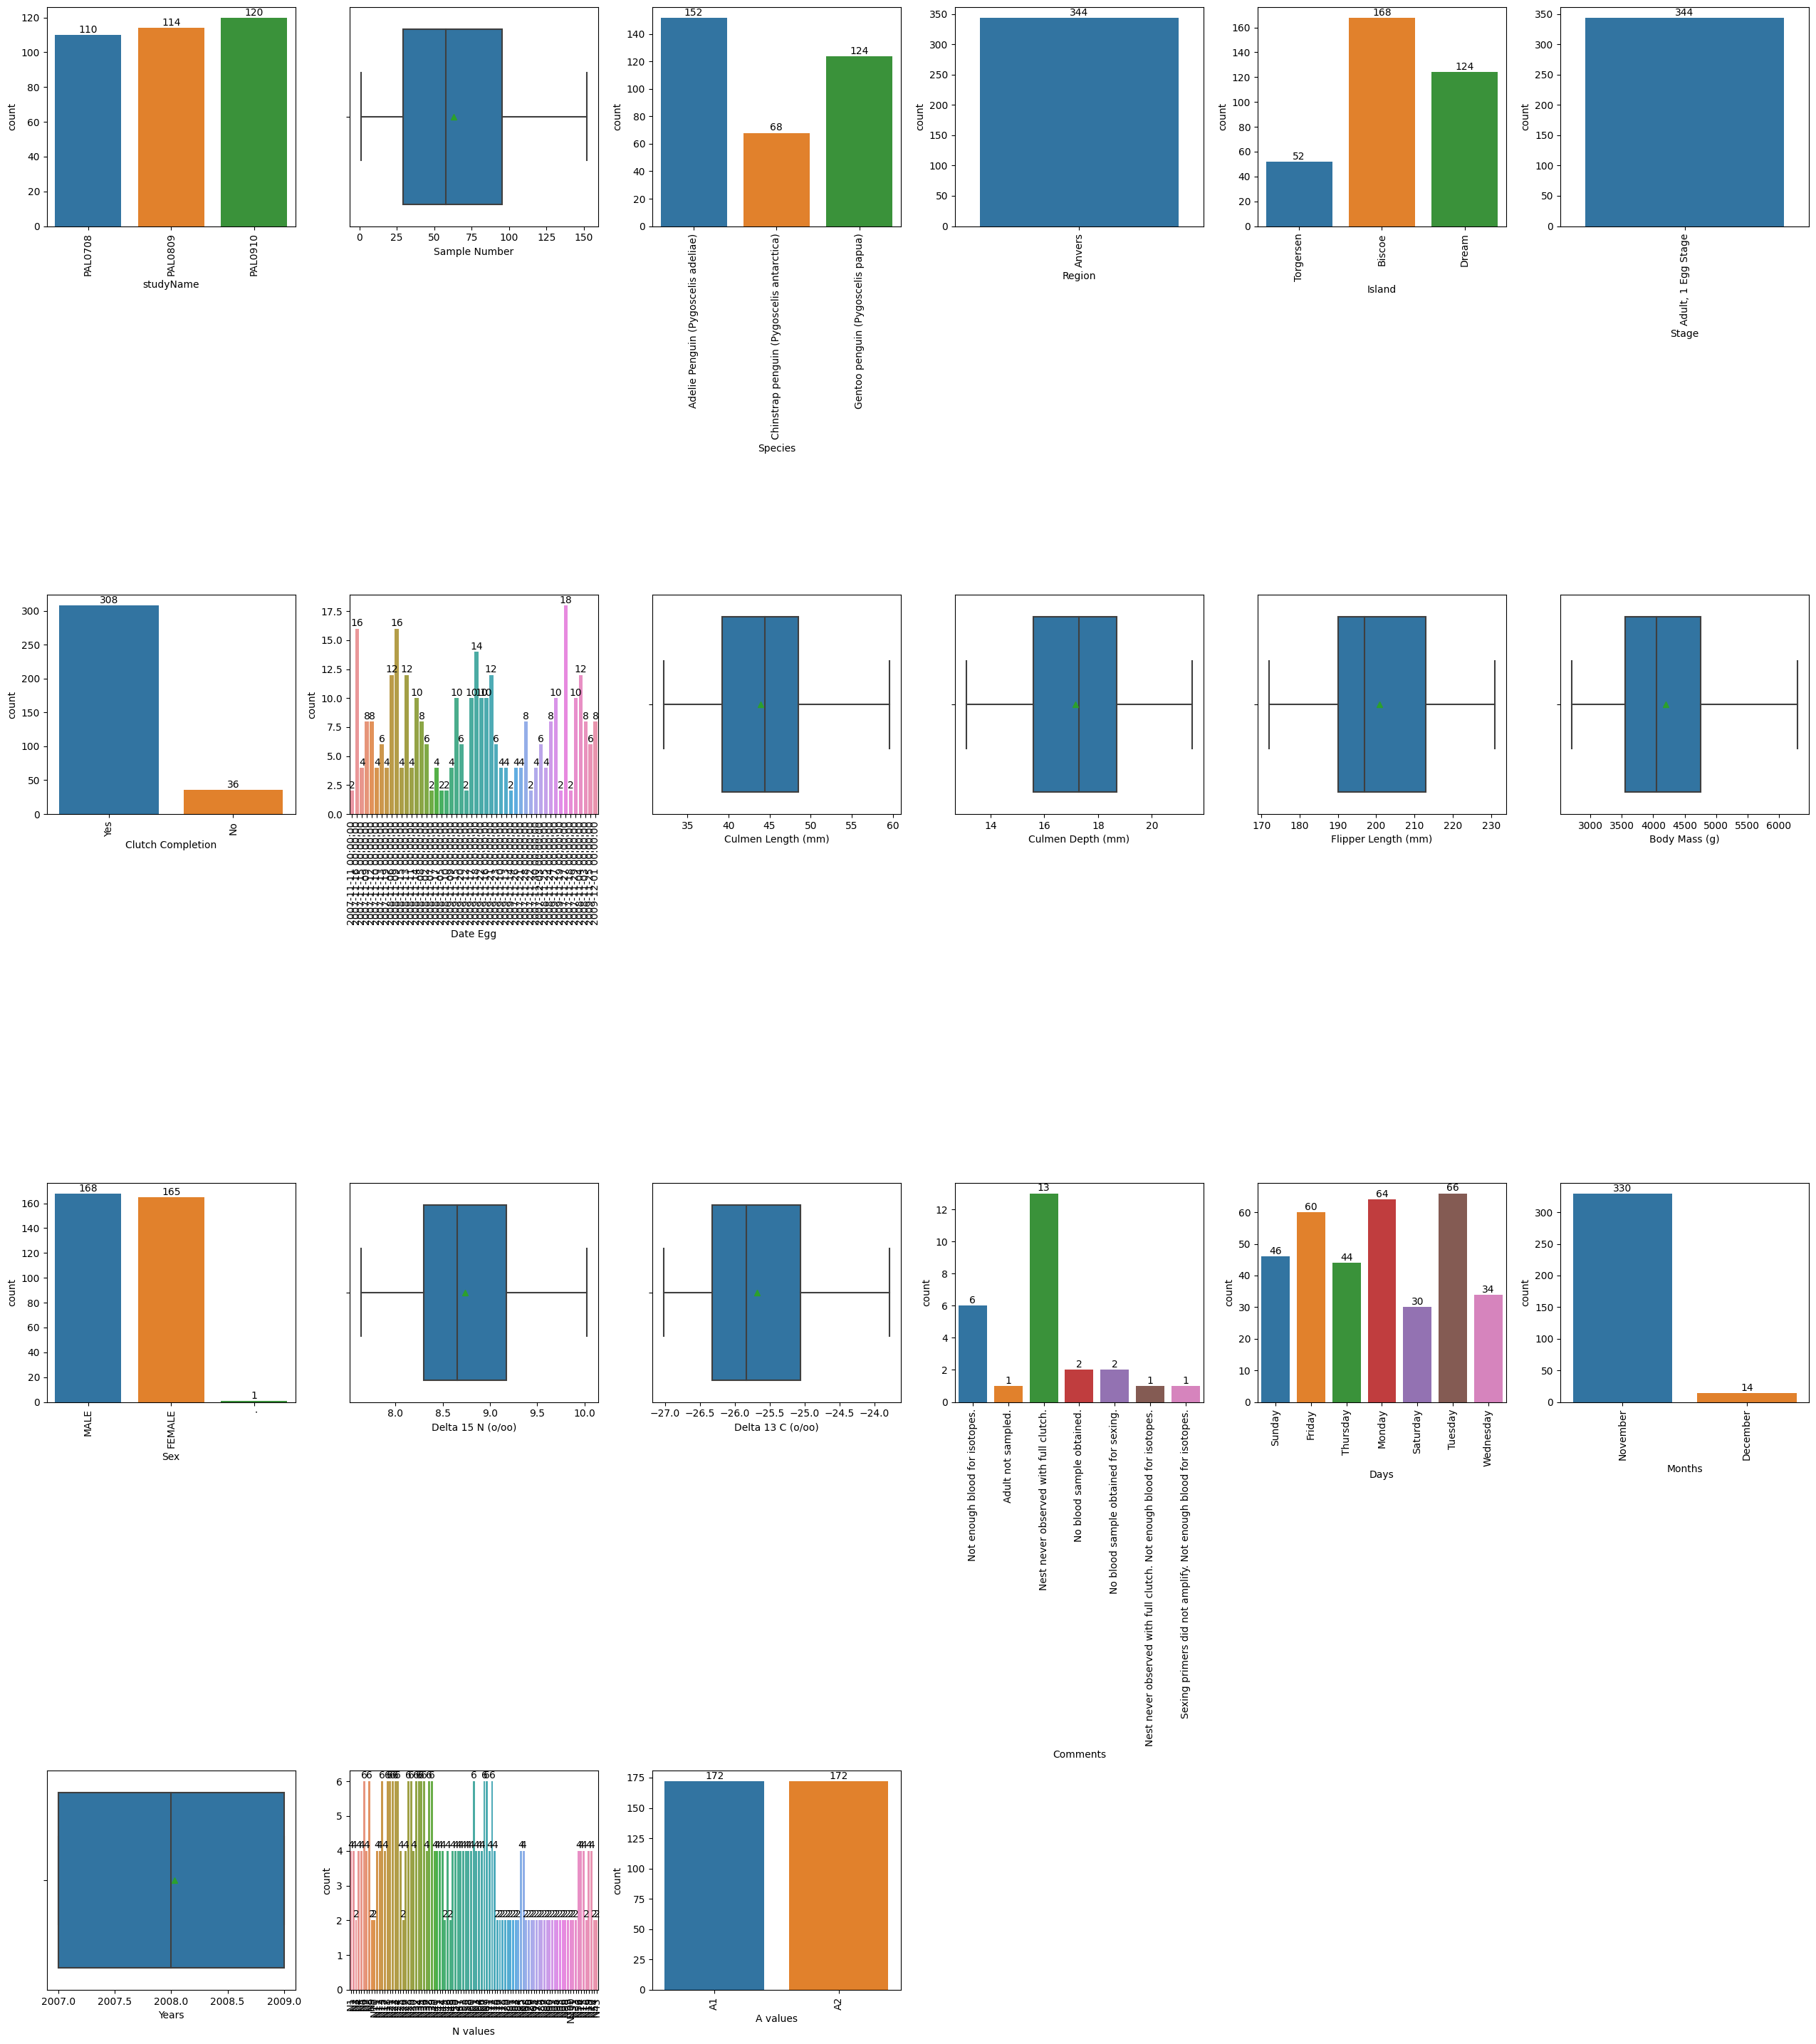

In [9]:
fp.plot_features(data=df, plot_type='boxplot', showmeans=True)

## Mendefinisikan Setiap Kolom

Hal ini bertujuan agar kita lebih memahami korelasi dari setiap kolom, atau informasi dari nilai pada setiap kolom, sehingga kita mendapatkan insight lebih, dan agar dapat menganalisis data menjadi lebih baik.

Berikut adalah penjelasan singkat tentang setiap kolom dalam dataset penguin:

- **studyName**: nama studi yang dilakukan oleh peneliti untuk mengumpulkan data penguin. Dalam dataset ini, nama studinya adalah **PAL0708**.
  - PAL0708 adalah nama studi yang dilakukan oleh peneliti untuk mengumpulkan data penguin di Kepulauan Palmer, Antartika. PAL0708 merupakan singkatan dari **Palmer Station Long Term Ecological Research Program 2007-2008**. Studi ini bertujuan untuk mempelajari ekologi dan perilaku penguin, serta pengaruh perubahan iklim terhadap populasi dan habitat mereka. Studi ini melibatkan pengukuran morfologi, massa tubuh, isotop stabil, dan sampel DNA dari tiga spesies penguin, yaitu Chinstrap, Adélie, dan Gentoo. Studi ini juga mencatat lokasi, tanggal, dan status bertelur dari setiap penguin yang diamati. Data yang dihasilkan dari studi ini dapat digunakan sebagai bahan pembelajaran mesin, visualisasi data, atau analisis statistik.
- **Sample Number**: nomor sampel yang diberikan oleh peneliti untuk setiap penguin yang diamati. Dalam dataset ini, nomor sampelnya berkisar dari **1** sampai **152**.
- **Species**: spesies penguin yang diamati. Dalam dataset ini, ada tiga spesies penguin, yaitu **Chinstrap**, **Adélie**, dan **Gentoo**.
- **Region**: wilayah geografis di mana penguin hidup. Dalam dataset ini, semua penguin hidup di wilayah **Antartika**.
- **Island**: nama pulau di mana penguin bersarang. Dalam dataset ini, ada tiga pulau yang berbeda, yaitu **Dream**, **Torgersen**, dan **Biscoe**.
- **Stage**: tahap perkembangan penguin yang diamati. Dalam dataset ini, semua penguin berada pada tahap **Adult**.
- **Individual ID**: kode unik yang diberikan oleh peneliti untuk mengidentifikasi setiap penguin secara individual. Dalam dataset ini, kode uniknya terdiri dari kombinasi huruf dan angka, misalnya **N1A1**, **N2A2**, dan sebagainya.
- **Clutch Completion**: status apakah penguin berhasil menyelesaikan proses bertelur atau tidak. Dalam dataset ini, statusnya dapat berupa **Yes** atau **No**.
- **Date Egg**: tanggal ketika penguin bertelur. Dalam dataset ini, tanggalnya ditulis dalam format **mm/dd/yyyy**, misalnya **11/11/2007**, **11/15/2007**, dan sebagainya.
- **Culmen Length (mm)**: panjang culmen (bagian atas paruh burung) penguin dalam milimeter. Dalam dataset ini, panjang culmennya berkisar dari **32.1** sampai **59.6**.
- **Culmen Depth (mm)**: kedalaman culmen (bagian atas paruh burung) penguin dalam milimeter. Dalam dataset ini, kedalaman culmennya berkisar dari **13.1** sampai **21.5**.
- **Flipper Length (mm)**: panjang flipper (sirip) penguin dalam milimeter. Dalam dataset ini, panjang flippernya berkisar dari **172** sampai **231**.
- **Body Mass (g)**: massa tubuh penguin dalam gram. Dalam dataset ini, massa tubuhnya berkisar dari **2700** sampai **6300**.
- **Sex**: jenis kelamin penguin. Dalam dataset ini, jenis kelaminnya dapat berupa **Male** atau **Female**. Ada juga beberapa nilai yang hilang atau tidak diketahui.
- **Delta 15 N (o/oo)**: ukuran rasio isotop stabil 15N:14N dalam jaringan penguin. Dalam dataset ini, nilai Delta 15 N berkisar dari **7.6** sampai **10.8**. Nilai Delta 15 N dapat digunakan untuk mengetahui posisi trofik (tingkat makanan) penguin dalam rantai makanan.
- **Delta 13 C (o/oo)**: ukuran rasio isotop stabil 13C:12C dalam jaringan penguin. Dalam dataset ini, nilai Delta 13 C berkisar dari −26.3 sampai −12.6. Nilai Delta 13 C dapat digunakan untuk mengetahui sumber karbon dan habitat penguin dalam ekosistem.
- **Comments**: catatan tambahan yang dibuat oleh peneliti tentang kondisi atau perilaku penguin yang diamati. Dalam dataset ini, beberapa catatan yang ada antara lain adalah **Adult not sampled**, **Studied previously in 2006**, dan sebagainya.

Sumber referensi:
- : [Penguins LTER - All Penguin Data](https://www.kaggle.com/paulinegovaert/penguins-lter-all-penguin-data)
- : [Penguins LTER - Palmer Station Antarctica](https://www.kaggle.com/paulinegovaert/penguins-lter-palmer-station-antarctica)
- : [Penguins LTER - Stable Isotope Data](https://www.kaggle.com/paulinegovaert/penguins-lter-stable-isotope-data)

## Handle outliers dan Nilai yang hilang

### Mengidentifikasi Outliers

Outlier adalah nilai yang sangat tinggi atau rendah yang tidak biasa yang terjadi dalam sebuah set data. Jika dibandingkan dengan pengamatan lain dalam dataset, outlier biasanya terlihat berbeda dan dianggap sebagai nilai yang ekstrem. Beberapa alasan outlier terjadi dalam dataset termasuk nilai ekstrim asli, kesalahan pengukuran, kesalahan kesalahan entri data, dan kesalahan pemrosesan data. Kesalahan pengukuran biasanya disebabkan oleh sistem yang salah, seperti timbangan, sensor, dan sebagainya. Kesalahan entri data terjadi ketika input yang tidak akurat diberikan oleh pengguna. Contohnya termasuk salah mengetik input, memberikan format data yang salah, atau menukar nilai (kesalahan transposisi). Kesalahan pemrosesan dapat terjadi selama agregasi atau transformasi data untuk menghasilkan output akhir.

### Spotting univariate outliers

In [10]:
sa.table_diagnose(data=df, show_dims=False)[['columns', 'skewness', 'IQR (< lower)', 'min', 	'max', 'IQR (> upper)', 'mean', 'meadian (Q2)', 'outliers (%)']]

columns  skewness        IQR (< lower)                  min   
0             studyName       NaN                  NaN                  NaN  \
1         Sample Number  0.351402              -70.375                    1   
2               Species       NaN                  NaN                  NaN   
3                Region       NaN                  NaN                  NaN   
4                Island       NaN                  NaN                  NaN   
5                 Stage       NaN                  NaN                  NaN   
6     Clutch Completion       NaN                  NaN                  NaN   
7              Date Egg       NaN  2004-12-14 12:00:00  2007-11-09 00:00:00   
8    Culmen Length (mm)  0.053118              25.3125                 32.1   
9     Culmen Depth (mm) -0.143465                10.95                 13.1   
10  Flipper Length (mm)  0.345682                155.5                172.0   
11        Body Mass (g)  0.470329               1750.0               2700.0   
12                  Sex       NaN                  NaN                  NaN   
13    Delta 15 N (o/oo)  0.238981             6.991541               7.6322   
14    Delta 13 C (o/oo)  0.337781           -28.207687            -27.01854   
15             Comments       NaN                  NaN                  NaN   
16                 Days       NaN                  NaN                  NaN   
17               Months       NaN                  NaN                  NaN   
18                Years -0.053728               2004.0                 2007   
19             N values       NaN                  NaN                  NaN   
20             A values       NaN                  NaN                  NaN   

                    max        IQR (> upper)                           mean   
0                   NaN                  NaN                            NaN  \
1                   152              194.625                      63.151163   
2                   NaN                  NaN                            NaN   
3                   NaN                  NaN                            NaN   
4                   NaN                  NaN                            NaN   
5                   NaN                  NaN                            NaN   
6                   NaN                  NaN                            NaN   
7   2009-12-01 00:00:00  2012-10-29 12:00:00  2008-11-27 03:46:02.790697728   
8                  59.6              62.4125                       43.92193   
9                  21.5                23.35                       17.15117   
10                231.0                247.5                     200.915205   
11               6300.0               6550.0                    4201.754386   
12                  NaN                  NaN                            NaN   
13             10.02544            10.480471                       8.733382   
14            -23.78767           -23.174668                     -25.686292   
15                  NaN                  NaN                            NaN   
16                  NaN                  NaN                            NaN   
17                  NaN                  NaN                            NaN   
18                 2009               2012.0                     2008.02907   
19                  NaN                  NaN                            NaN   
20                  NaN                  NaN                            NaN   

           meadian (Q2) outliers (%)  
0                   NaN          NaN  
1                  58.0          0.0  
2                   NaN          NaN  
3                   NaN          NaN  
4                   NaN          NaN  
5                   NaN          NaN  
6                   NaN          NaN  
7   2008-11-09 00:00:00          0.0  
8                 44.45          0.0  
9                  17.3          0.0  
10                197.0          0.0  
11               4050.0          0.0  
12                  NaN        

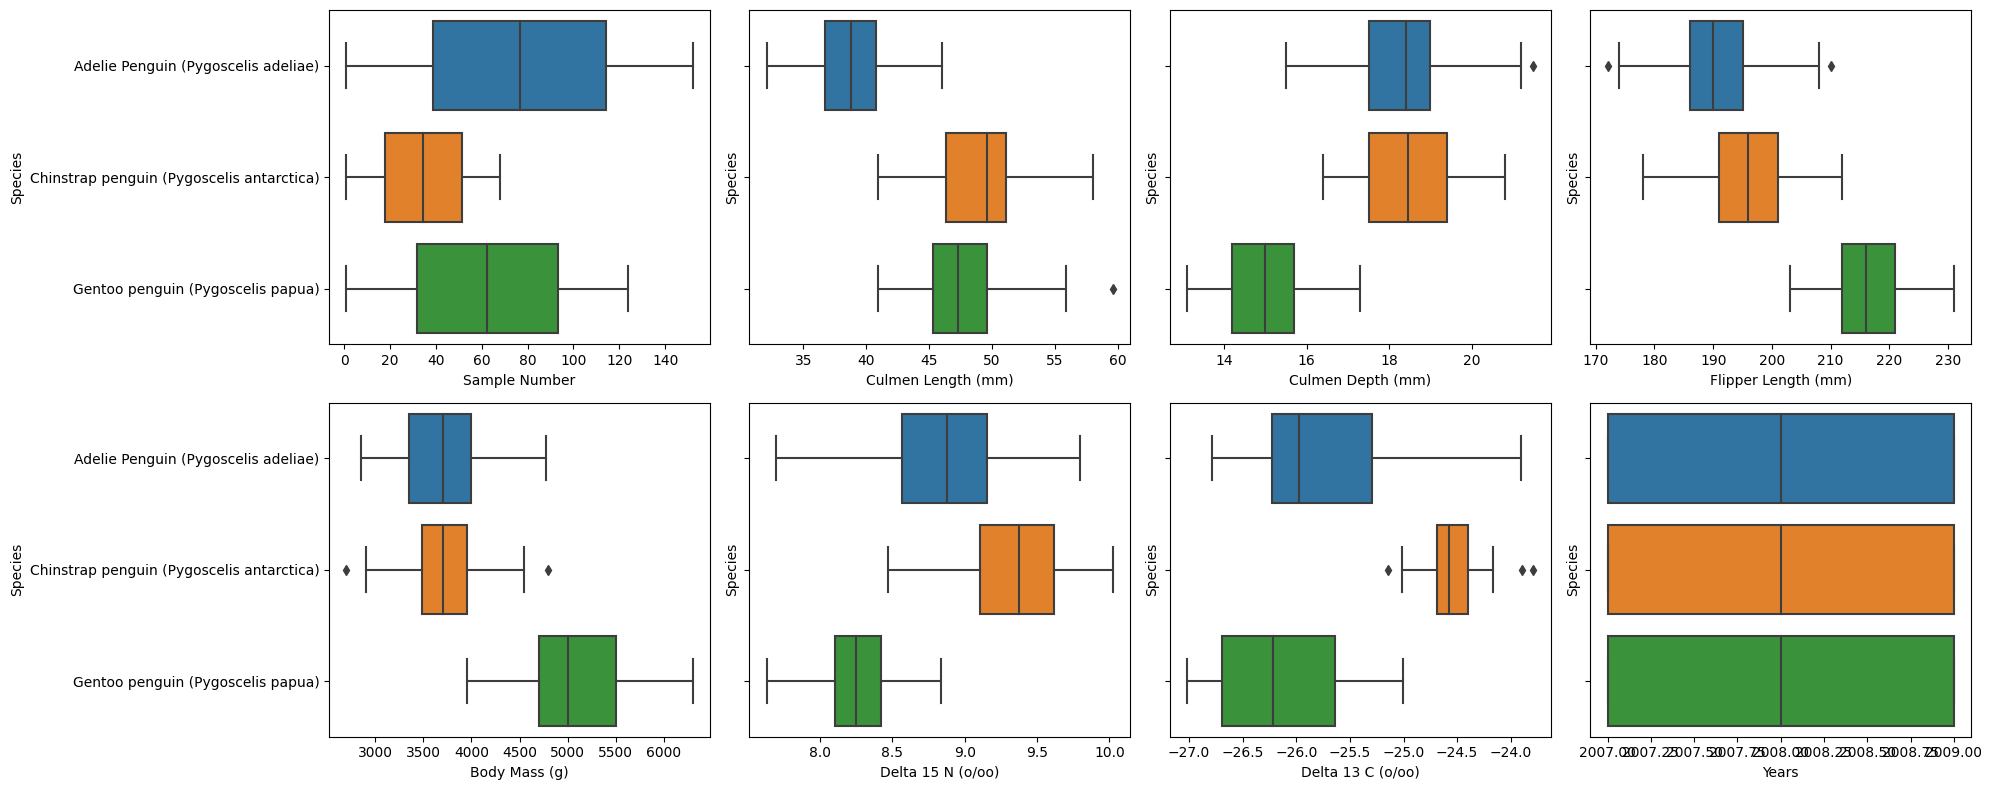

In [11]:
num_features = df.select_dtypes(include='number')

num_subplots = len(num_features.columns)
num_rows = int(np.sqrt(num_subplots))
num_cols = int(np.ceil(num_subplots / num_rows))

f, axs = plt.subplots(num_rows, num_cols, figsize=(20, 8), sharey=True)

for i in range(num_rows):
    for j in range(num_cols):
        if i * num_cols + j < num_subplots:
            col_name = num_features.columns[i * num_cols + j]
            sns.boxplot(data=df, x=col_name, y='Species', ax=axs[i, j])

plt.tight_layout()
plt.show()

### Finding bivariate outliers

<Figure size 640x480 with 0 Axes>

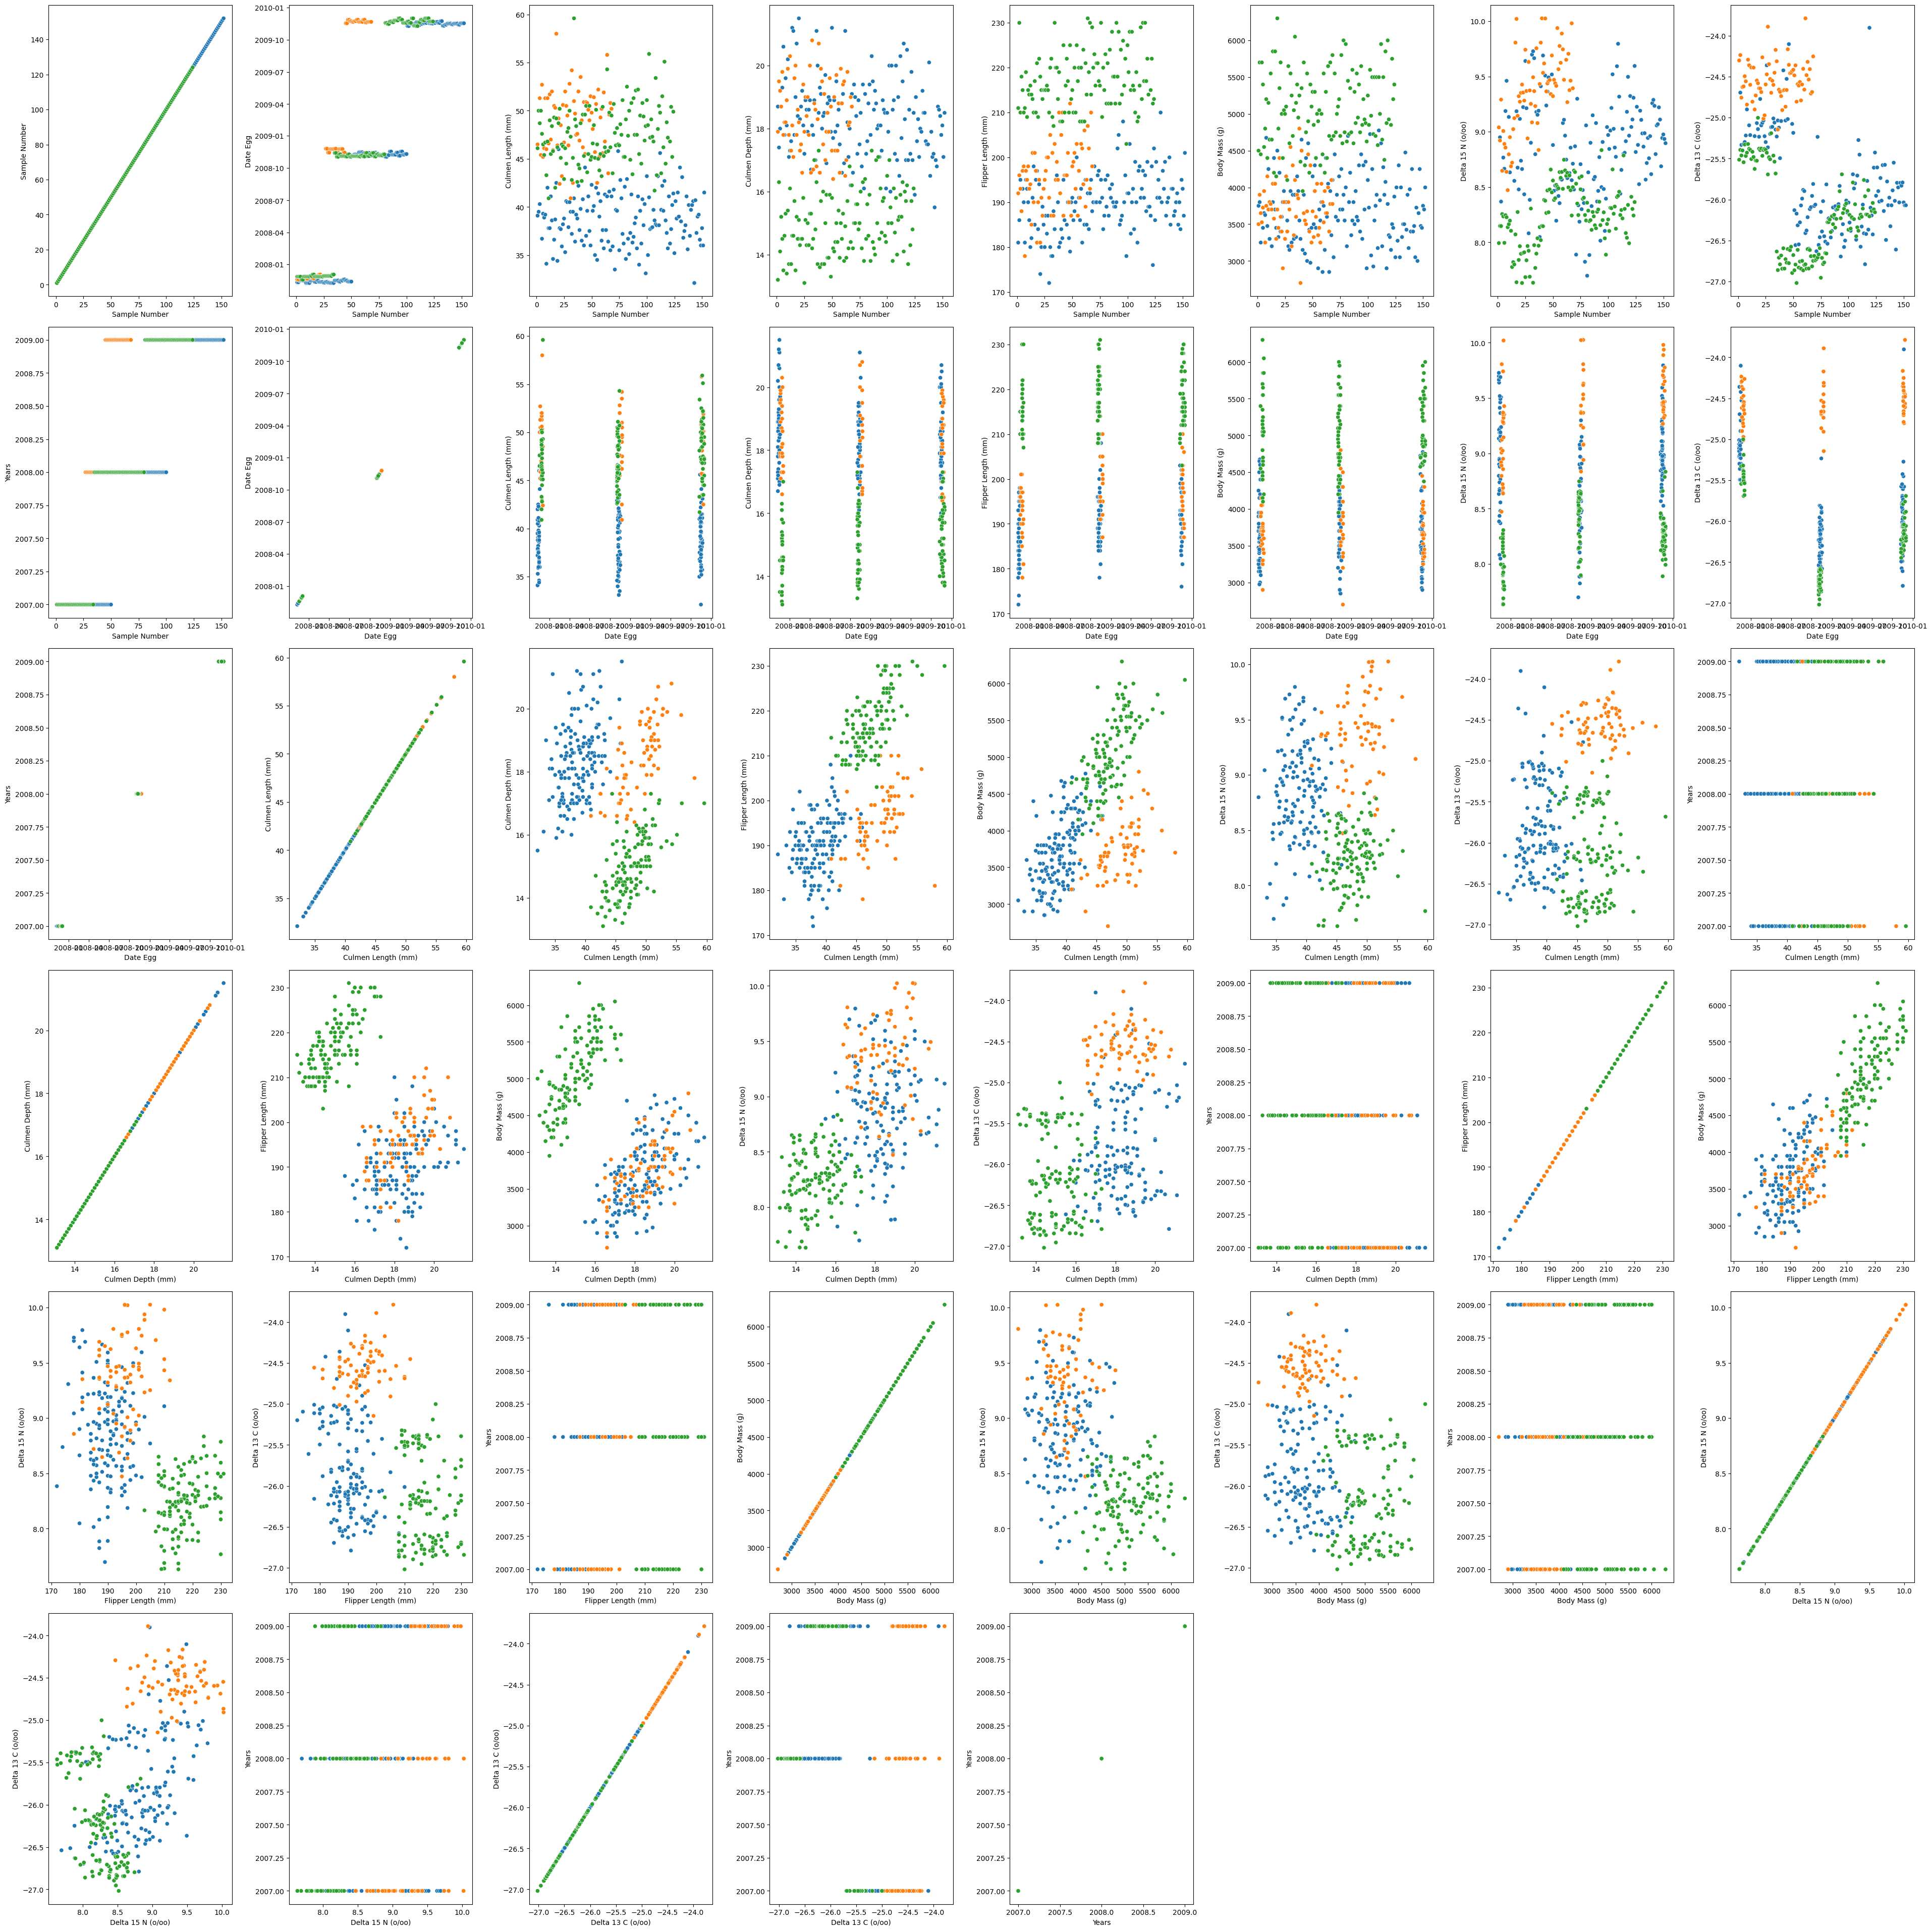

In [12]:
fp.plot_features(data=df, plot_type='scatter', hue='Species', legend=False)

### Replacing Outlier | Removing Outlier
berdasarkan tabel diagnose di atas bahwa outlier untuk setiap variabel 0% menurut pendekatan IQR, sehingga kita tidak bisa melakukan removing maupun replacing

## Identifying missing values

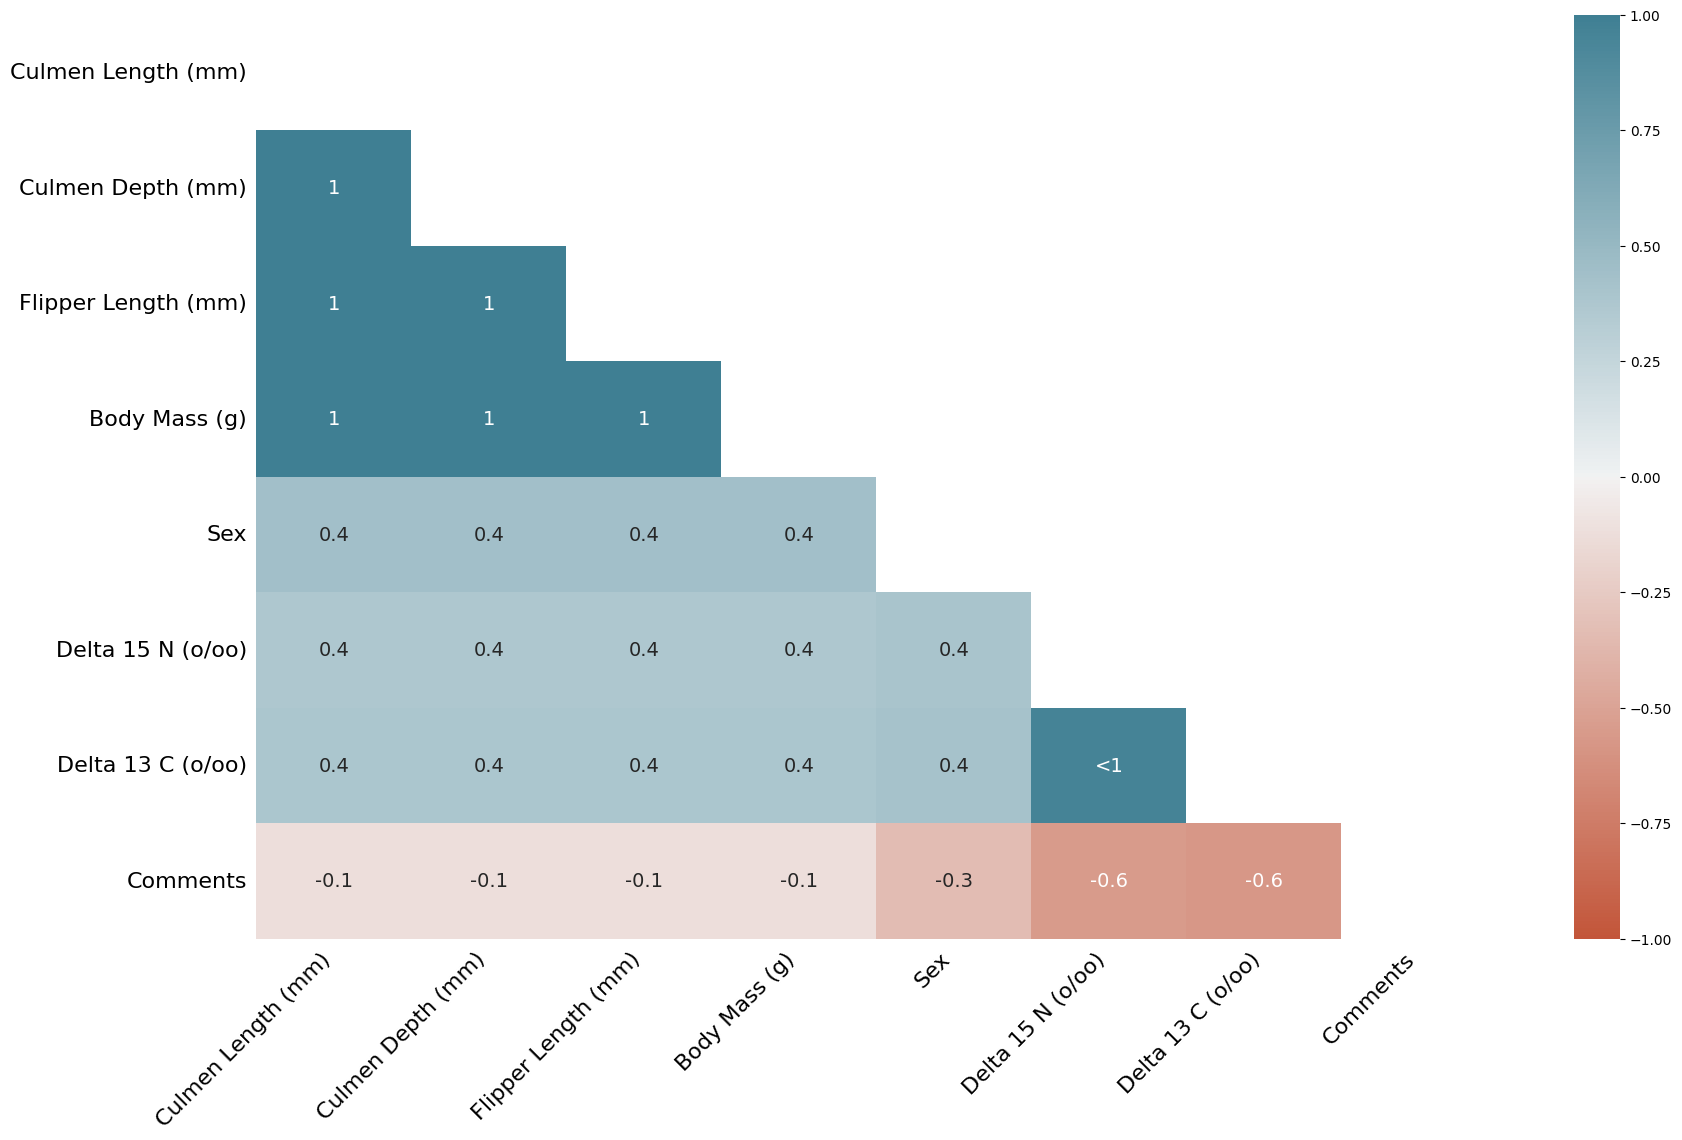

In [13]:
mp = MissingDataPlotter()
mp.missing_plot(data=df, plot_type='heatmap', cmap=sns.diverging_palette(20, 220, as_cmap=True))

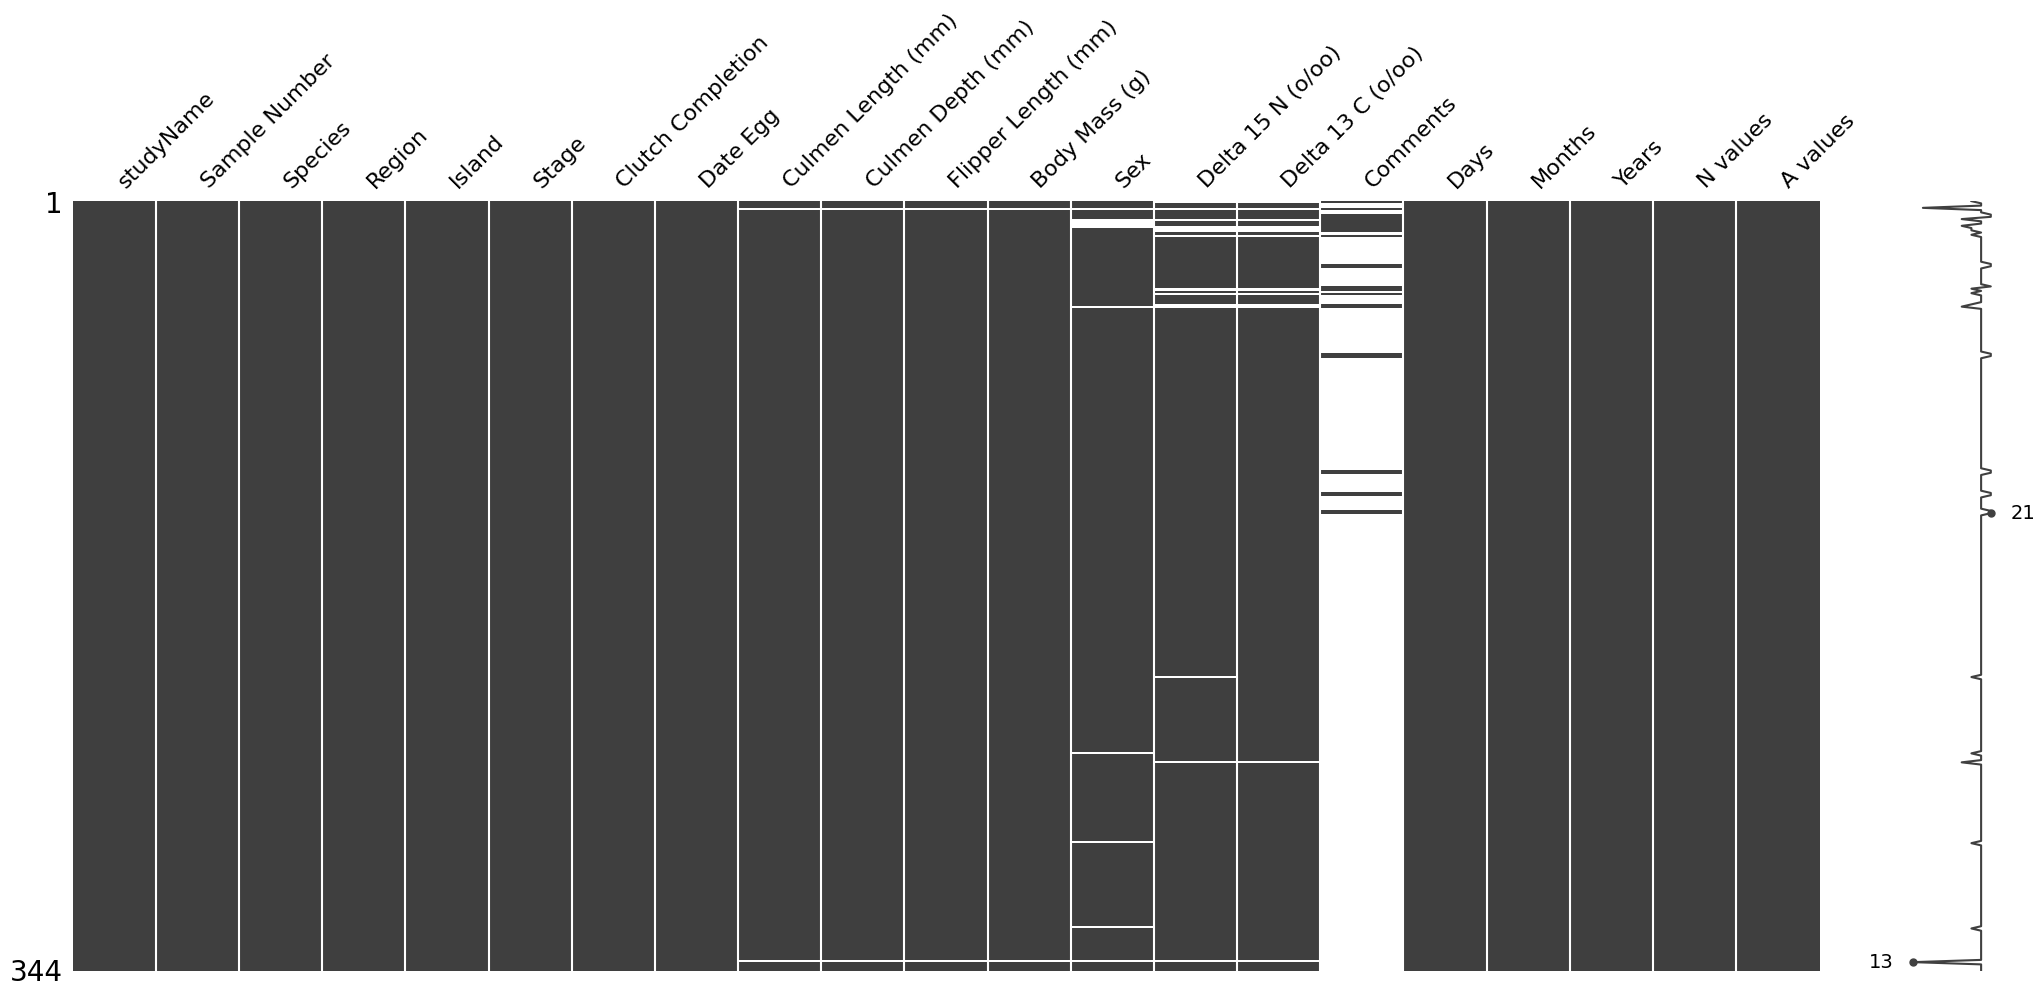

In [14]:
mp.missing_plot(data=df, plot_type='matrix')

<Figure size 640x480 with 0 Axes>

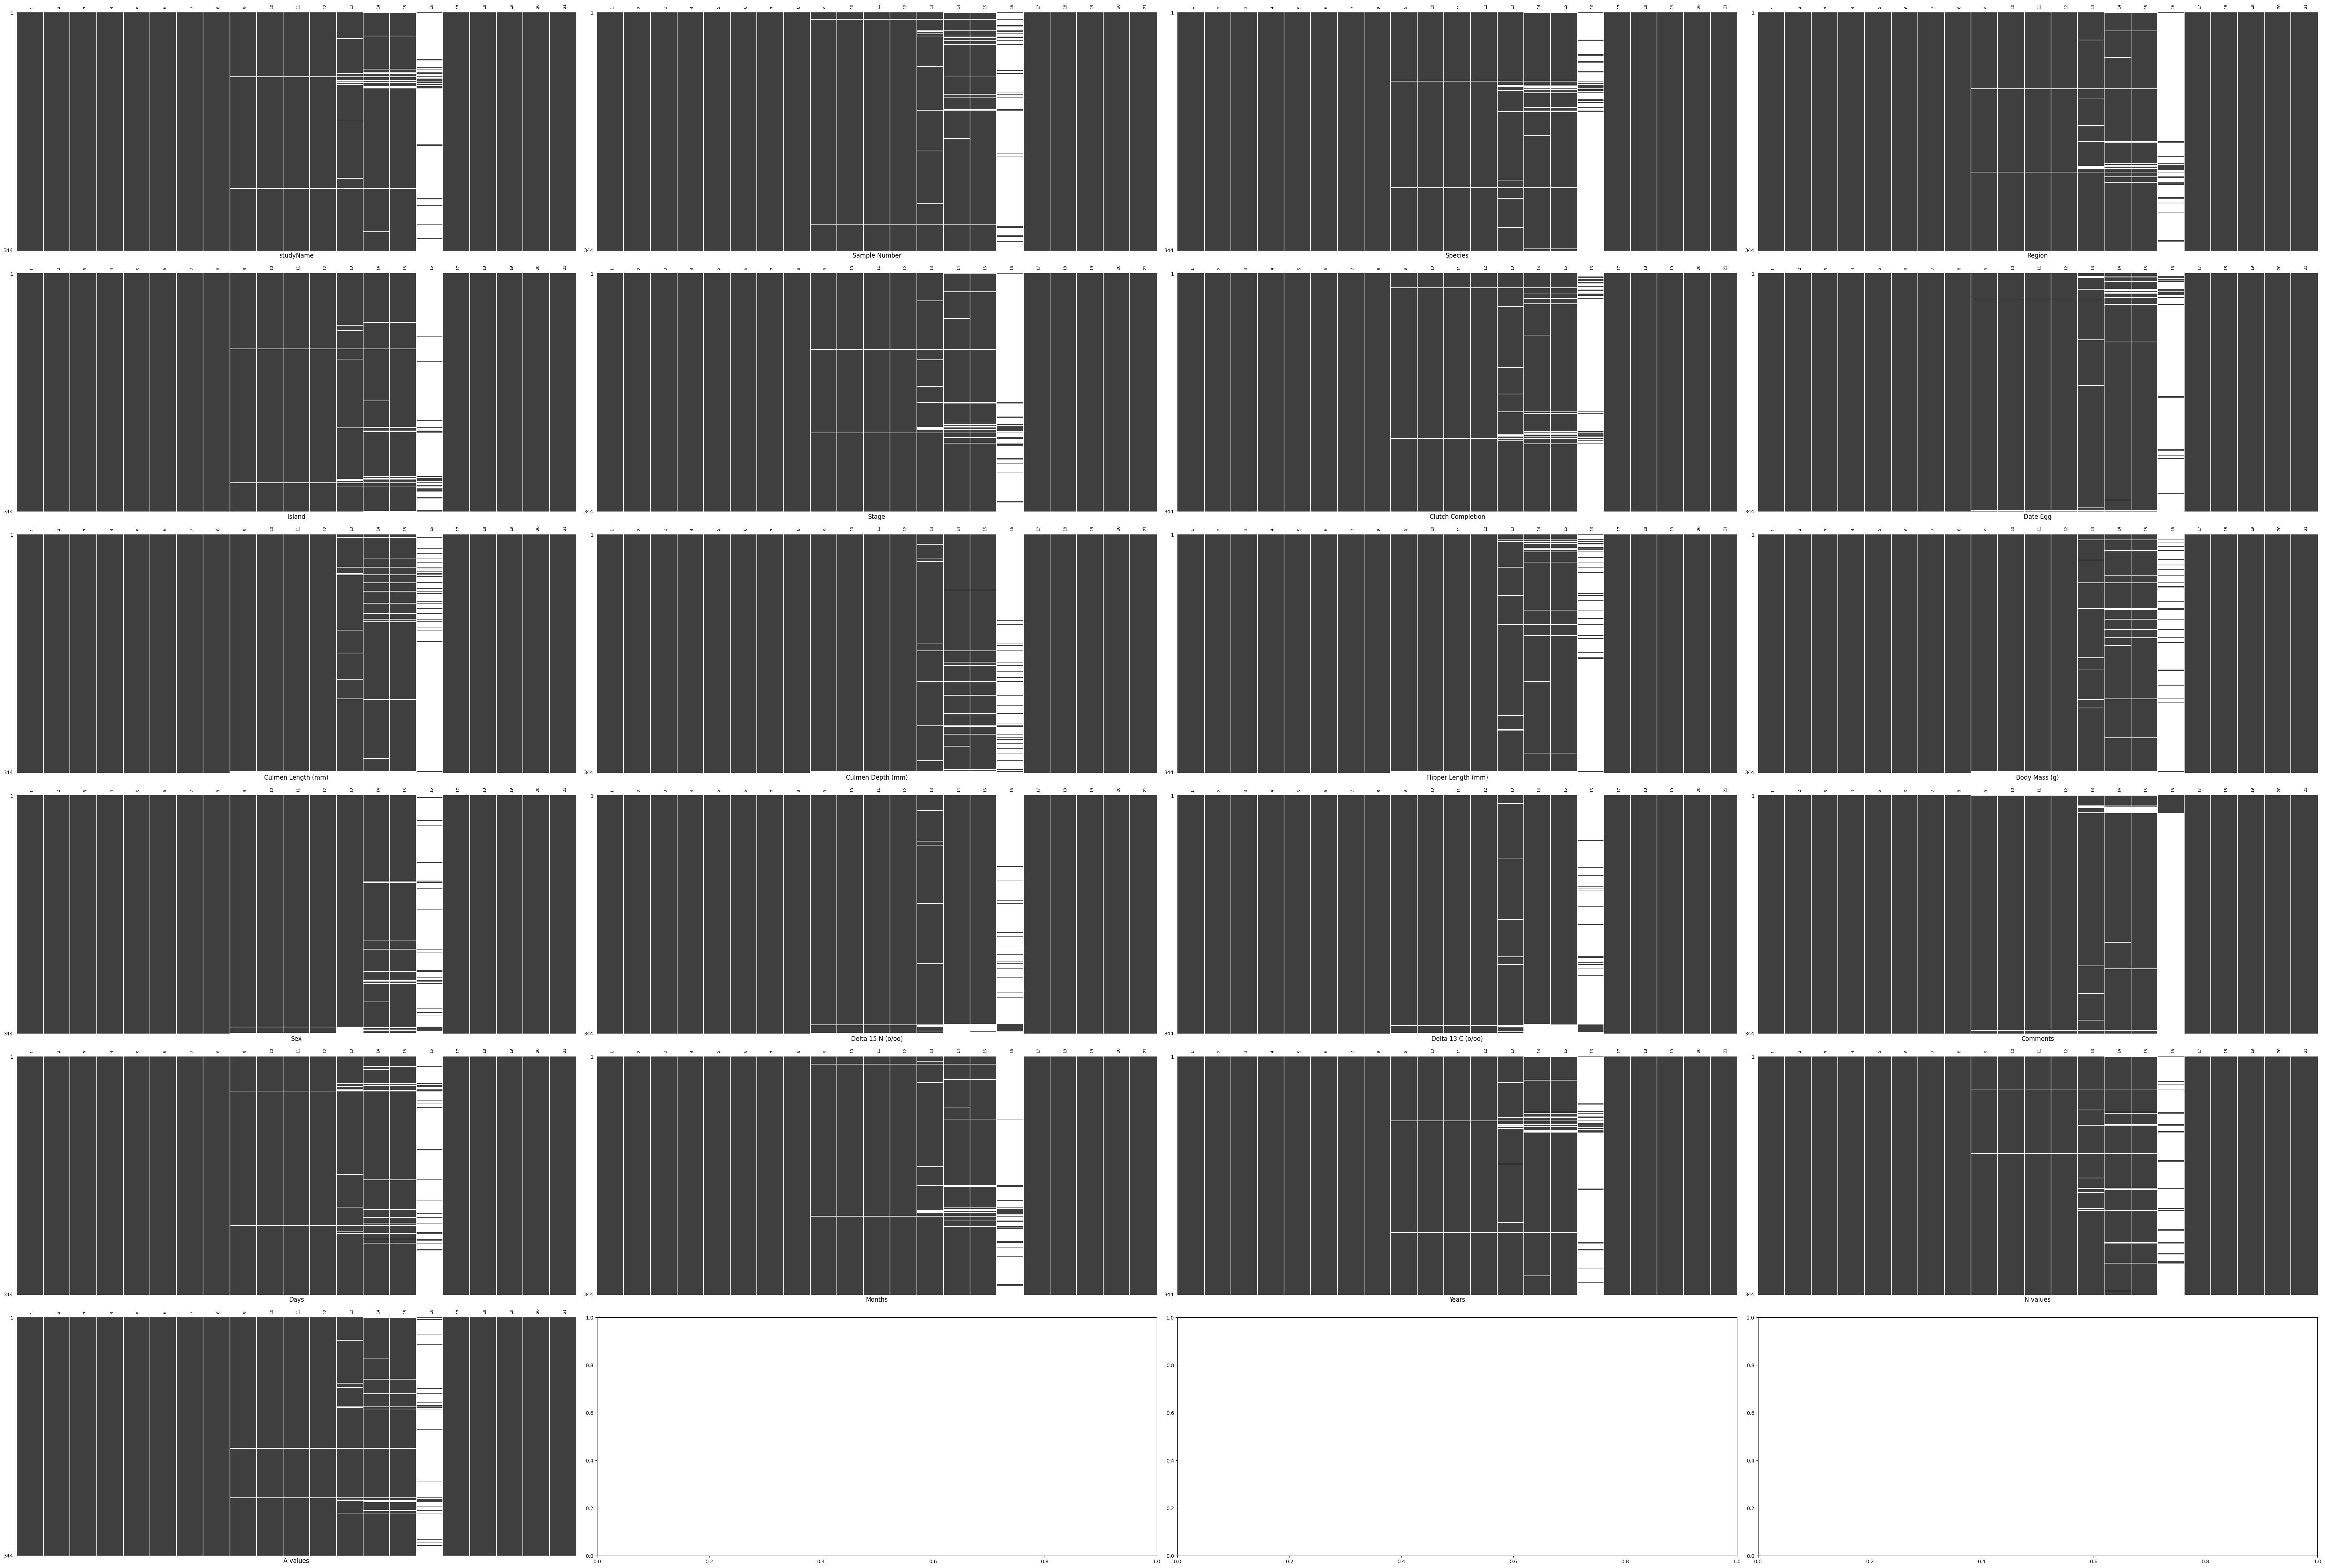

In [15]:
mp.plot_missing_data(data=df, is_null=True)

In [16]:
for i, value in enumerate(df.columns):
    print(f'{value}: {i+1}')

studyName: 1
Sample Number: 2
Species: 3
Region: 4
Island: 5
Stage: 6
Clutch Completion: 7
Date Egg: 8
Culmen Length (mm): 9
Culmen Depth (mm): 10
Flipper Length (mm): 11
Body Mass (g): 12
Sex: 13
Delta 15 N (o/oo): 14
Delta 13 C (o/oo): 15
Comments: 16
Days: 17
Months: 18
Years: 19
N values: 20
A values: 21


Dari matrix plot dan heatmap bisa disimpulkan bahwa:
- Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g) adalah MAR
- Delta 15 N (o/oo) dan Delta 13 C (o/oo) adalah MAR
- Sex adalah MCAR
- Comments adalah MNAR | MAR terhadap Delta 15 N (o/oo) dan Delta 13 C (o/oo)

MCAR: Tersebar secara acak di dalam set data. Memiliki nilai nol yang jauh lebih sedikit daripada jenis missing lainnya. Tidak memiliki korelasi dengan variabel lain. Dapat disebabkan oleh kesalahan teknis atau kesalahan manusia selama entri data.

MAR: Lebih luas dari MCAR. Keacakan hanya terjadi pada kelompok data tertentu. Misalnya, siswa tertentu lebih sering membolos saat musim dingin, orang tua mengosongkan kolom Mobile OS karena mereka tidak tahu cara menggunakan ponsel, dll. Perbedaan yang jelas dengan MCAR adalah bahwa MAR akan selalu memiliki hubungan dengan nilai yang diamati.

MNAR: Kasus penghilangan yang terakhir dan paling sulit. Kasus ini tersebar secara acak di dalam dataset, namun jumlah nilai yang hilang yang sangat besar menunjukkan adanya faktor yang tidak teramati yang mempengaruhi ketidakhadiran. Seberapa dalam pun Anda mencari, Anda tidak akan menemukan hubungan dengan fitur yang ada. Tipe ini akan selalu memiliki beberapa hubungan sistematis dengan faktor yang tidak teramati seperti membiarkan kolom IQ kosong karena malu, membiarkan nilai kepuasan kosong karena pelanggan tidak dapat memasukkan kepuasan mereka ke dalam nilai yang diberikan, dll.

In [17]:
df.loc[:, ['Comments', 'Delta 13 C (o/oo)', 'Delta 15 N (o/oo)']].sort_values(by='Comments', ascending=False)[:30]

Comments  Delta 13 C (o/oo)   
47   Sexing primers did not amplify. Not enough blo...                NaN  \
12                      Not enough blood for isotopes.                NaN   
46                      Not enough blood for isotopes.                NaN   
41                      Not enough blood for isotopes.                NaN   
15                      Not enough blood for isotopes.                NaN   
0                       Not enough blood for isotopes.                NaN   
13                      Not enough blood for isotopes.                NaN   
11                           No blood sample obtained.                NaN   
8                            No blood sample obtained.                NaN   
10                No blood sample obtained for sexing.          -25.21315   
9                 No blood sample obtained for sexing.          -25.09368   
39   Nest never observed with full clutch. Not enou...                NaN   
69               Nest never observed with full clutch.          -26.06209   
130              Nest never observed with full clutch.          -25.57956   
121              Nest never observed with full clutch.          -26.42563   
120              Nest never observed with full clutch.          -26.19444   
131              Nest never observed with full clutch.          -26.13960   
138              Nest never observed with full clutch.          -26.07021   
38               Nest never observed with full clutch.          -25.04169   
68               Nest never observed with full clutch.          -26.07821   
29               Nest never observed with full clutch.          -25.11609   
28               Nest never observed with full clutch.          -25.19837   
7                Nest never observed with full clutch.          -24.89958   
6                Nest never observed with full clutch.          -25.21799   
139              Nest never observed with full clutch.          -25.88798   
3                                   Adult not sampled.                NaN   
1                                                  NaN          -24.69454   
2                                                  NaN          -25.33302   
4                                                  NaN          -25.32426   
5                                                  NaN          -25.29805   

     Delta 15 N (o/oo)  
47                 NaN  
12                 NaN  
46                 NaN  
41                 NaN  
15                 NaN  
0                  NaN  
13                 NaN  
11                 NaN  
8                  NaN  
10             8.63243  
9              9.13362  
39                 NaN  
69             8.86853  
130            8.98460  
121            9.11066  
120            9.04296  
131            8.86495  
138            8.61651  
38             9.41131  
68             8.47781  
29             8.90027  
28             8.38404  
7              9.46060  
6              9.18718  
139            9.25769  
3                  NaN  
1              8.94956  
2              8.36821  
4              8.76651  
5              8.66496

Comments yang memiliki nilai Not enough blood for isotopes maka kolom Delta 15 N (o/oo)	Delta 13 C (o/oo) akan kosong karna:

Delta 15 N dan Delta 13 C adalah ukuran rasio dua isotop stabil nitrogen (15 N dan 14 N) dan karbon (13 C dan 12 C) dalam jaringan organik2. Nilai Delta 15 N dan Delta 13 C dapat digunakan untuk mengetahui sumber makanan, posisi trofik, dan kondisi fisiologis dari organisme23.

Untuk mengukur nilai Delta 15 N dan Delta 13 C, diperlukan sampel darah dari penguin yang cukup banyak. Namun, dalam beberapa kasus, ada penguin yang tidak memiliki cukup darah untuk diambil sampelnya. Hal ini bisa disebabkan oleh berbagai faktor, seperti ukuran tubuh, kondisi kesehatan, atau kesulitan pengambilan sampel. Oleh karena itu, kolom Delta 15 N (‰) dan Delta 13 C (‰) akan kosong untuk penguin-penguin tersebut, dan kolom Comments akan mencatat alasan mengapa tidak ada sampel darah yang cukup.

In [18]:
import imputena as imp

df_imputed = imp.interpolation(
  data=df, 
  method='linear', 
  direction='both', 
  columns=['Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], 
  inplace=False
)

df_imputed['Sex'].replace(
  to_replace='.',
  value=df_imputed['Sex'].mode()[0],
  inplace=True
)

df_imputed['Sex'].replace(
  {'MALE':0, 'FEMALE':1},
  inplace=True
)

target_cols_imputation = ['Sex', 'Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

df_imputed.loc[:, target_cols_imputation] = imp.knn(
  data=df_imputed.loc[:, target_cols_imputation], 
  columns=['Sex'], 
  k=5,
)


In [19]:
sa.table_diagnose(data=df_imputed)

rows  columns  number  object  datetime  timedelta  category   
Count   344       21       9      11         1          0         0  \

       datetimetz  
Count           0

columns n null n unique           types   
0             studyName      0        3          object  \
1         Sample Number      0      152           int64   
2               Species      0        3          object   
3                Region      0        1          object   
4                Island      0        3          object   
5                 Stage      0        1          object   
6     Clutch Completion      0        2          object   
7              Date Egg      0       50  datetime64[ns]   
8    Culmen Length (mm)      0      164         float64   
9     Culmen Depth (mm)      0       81         float64   
10  Flipper Length (mm)      0       56         float64   
11        Body Mass (g)      0       95         float64   
12                  Sex      0        3         float64   
13    Delta 15 N (o/oo)      0      343         float64   
14    Delta 13 C (o/oo)      0      343         float64   
15             Comments    318        7          object   
16                 Days      0        7          object   
17               Months      0        2          object   
18                Years      0        3           int32   
19             N values      0       95          object   
20             A values      0        2          object   

                                          unique vals percentages null (%)   
0                         [PAL0708, PAL0809, PAL0910]                  0.0  \
1                                                 NaN                  0.0   
2   [Adelie Penguin (Pygoscelis adeliae), Chinstra...                  0.0   
3                                            [Anvers]                  0.0   
4                          [Torgersen, Biscoe, Dream]                  0.0   
5                                [Adult, 1 Egg Stage]                  0.0   
6                                           [Yes, No]                  0.0   
7                                                 NaN                  0.0   
8                                                 NaN                  0.0   
9                                                 NaN                  0.0   
10                                                NaN                  0.0   
11                                                NaN                  0.0   
12                                    [0.0, 1.0, 0.8]                  0.0   
13                                                NaN                  0.0   
14                                                NaN                  0.0   
15  [Not enough blood for isotopes., nan, Adult no...             92.44186   
16  [Sunday, Friday, Thursday, Monday, Saturday, T...                  0.0   
17                               [November, December]                  0.0   
18                                 [2007, 2008, 2009]                  0.0   
19                                                NaN                  0.0   
20                                           [A1, A2]                  0.0   

    skewness                          std                  min   
0        NaN                          NaN                  NaN  \
1   0.351402                    40.430199                    1   
2        NaN                          NaN                  NaN   
3        NaN                          NaN                  NaN   
4        NaN                          NaN                  NaN   
5        NaN                          NaN                  NaN   
6        NaN                          NaN                  NaN   
7        NaN  298 days 19:50:44.783416800  2007-11-09 00:00:00   
8   0.054384                     5.454038                 32.1   
9  -0.145181                     1.978015                 13.1   
10  0.343037                    14.044782                172.0   
11  0.467994                   801.789816               2700.0   
12 -0.006871                     0.498861                  0.0   
13  0.218274                     0.552652               7.6322   
14  0.2766

In [20]:
df_imputed['Sex'].replace(
  {
    0:'MALE',
    1:'FEMALE',
    0.8:'FEMALE'
  },
  inplace=True
)

In [21]:
sa.table_diagnose(data=df_imputed)

rows  columns  number  object  datetime  timedelta  category   
Count   344       21       8      12         1          0         0  \

       datetimetz  
Count           0

columns n null n unique           types   
0             studyName      0        3          object  \
1         Sample Number      0      152           int64   
2               Species      0        3          object   
3                Region      0        1          object   
4                Island      0        3          object   
5                 Stage      0        1          object   
6     Clutch Completion      0        2          object   
7              Date Egg      0       50  datetime64[ns]   
8    Culmen Length (mm)      0      164         float64   
9     Culmen Depth (mm)      0       81         float64   
10  Flipper Length (mm)      0       56         float64   
11        Body Mass (g)      0       95         float64   
12                  Sex      0        2          object   
13    Delta 15 N (o/oo)      0      343         float64   
14    Delta 13 C (o/oo)      0      343         float64   
15             Comments    318        7          object   
16                 Days      0        7          object   
17               Months      0        2          object   
18                Years      0        3           int32   
19             N values      0       95          object   
20             A values      0        2          object   

                                          unique vals percentages null (%)   
0                         [PAL0708, PAL0809, PAL0910]                  0.0  \
1                                                 NaN                  0.0   
2   [Adelie Penguin (Pygoscelis adeliae), Chinstra...                  0.0   
3                                            [Anvers]                  0.0   
4                          [Torgersen, Biscoe, Dream]                  0.0   
5                                [Adult, 1 Egg Stage]                  0.0   
6                                           [Yes, No]                  0.0   
7                                                 NaN                  0.0   
8                                                 NaN                  0.0   
9                                                 NaN                  0.0   
10                                                NaN                  0.0   
11                                                NaN                  0.0   
12                                     [MALE, FEMALE]                  0.0   
13                                                NaN                  0.0   
14                                                NaN                  0.0   
15  [Not enough blood for isotopes., nan, Adult no...             92.44186   
16  [Sunday, Friday, Thursday, Monday, Saturday, T...                  0.0   
17                               [November, December]                  0.0   
18                                 [2007, 2008, 2009]                  0.0   
19                                                NaN                  0.0   
20                                           [A1, A2]                  0.0   

    skewness                          std                  min   
0        NaN                          NaN                  NaN  \
1   0.351402                    40.430199                    1   
2        NaN                          NaN                  NaN   
3        NaN                          NaN                  NaN   
4        NaN                          NaN                  NaN   
5        NaN                          NaN                  NaN   
6        NaN                          NaN                  NaN   
7        NaN  298 days 19:50:44.783416800  2007-11-09 00:00:00   
8   0.054384                     5.454038                 32.1   
9  -0.145181                     1.978015                 13.1   
10  0.343037                    14.044782                172.0   
11  0.467994                   801.789816               2700.0   
12       NaN                          NaN                  NaN   
13  0.218274                     0.552652               7.6322   
14  0.2766

## Analisis kenapa hasil mode seperti itu (membandingkan dengan tipe data kategori yang lain)

studyName
PAL0708    110
PAL0809    114
PAL0910    120
Name: count, dtype: int64

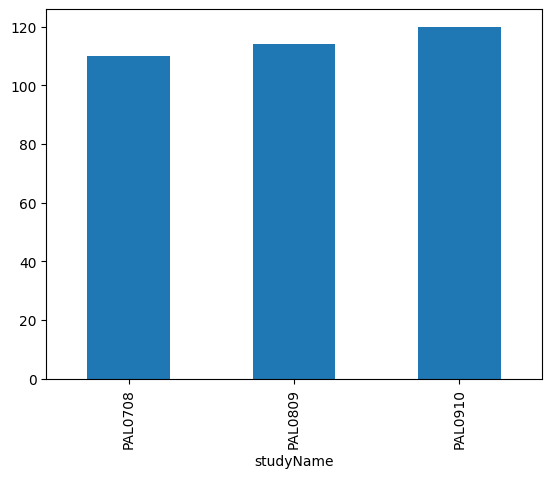

In [22]:
df['studyName'].value_counts().sort_index().plot(kind='bar')
df['studyName'].value_counts().sort_index()

Berdasarkan informasi di atas bahwa penelitian ini dilakukan selama kurang lebih 3 tahun yaitu dengan range dari 2007 - 2010, dimana pada tahun 2009 - 2010 sebanyak 120 sampel yang diambil dan menjadi jumlah sampel yang terbanyak di antara waktu penelitian yang lain (2007-2008 | 2008 - 2009)

In [23]:
pd.crosstab(index=df.studyName, columns=df.Species)

Species    Adelie Penguin (Pygoscelis adeliae)   
studyName                                        
PAL0708                                     50  \
PAL0809                                     50   
PAL0910                                     52   

Species    Chinstrap penguin (Pygoscelis antarctica)   
studyName                                              
PAL0708                                           26  \
PAL0809                                           18   
PAL0910                                           24   

Species    Gentoo penguin (Pygoscelis papua)  
studyName                                     
PAL0708                                   34  
PAL0809                                   46  
PAL0910                                   44

Pada tabel di atas menunjukkan bahwa untuk species Adelie yang paling banyak di ambil sampelnya di bandingkan species lain, mungkin karna populasi yang lebih banyak adelie, di daerah tersebut

In [24]:
pd.crosstab(index=df.studyName, columns=[df.Island, df.Species])

Island                                 Biscoe   
Species   Adelie Penguin (Pygoscelis adeliae)   
studyName                                       
PAL0708                                    10  \
PAL0809                                    18   
PAL0910                                    16   

Island                                        
Species   Gentoo penguin (Pygoscelis papua)   
studyName                                     
PAL0708                                  34  \
PAL0809                                  46   
PAL0910                                  44   

Island                                  Dream   
Species   Adelie Penguin (Pygoscelis adeliae)   
studyName                                       
PAL0708                                    20  \
PAL0809                                    16   
PAL0910                                    20   

Island                                                
Species   Chinstrap penguin (Pygoscelis antarctica)   
studyName                                             
PAL0708                                          26  \
PAL0809                                          18   
PAL0910                                          24   

Island                              Torgersen  
Species   Adelie Penguin (Pygoscelis adeliae)  
studyName                                      
PAL0708                                    20  
PAL0809                                    16  
PAL0910                                    16

In [25]:
pd.crosstab(index=df.Species, columns=df.Island)

Island                                     Biscoe  Dream  Torgersen
Species                                                            
Adelie Penguin (Pygoscelis adeliae)            44     56         52
Chinstrap penguin (Pygoscelis antarctica)       0     68          0
Gentoo penguin (Pygoscelis papua)             124      0          0

In [26]:
df['Species'].value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

Tabel tersebut menunjukkan distribusi spesies penguin di tiga pulau yang berbeda di Kepulauan Palmer, yaitu Biscoe, Dream, dan Torgersen. Kepulauan Palmer adalah sebuah gugusan pulau yang terletak di sebelah barat Semenanjung Antartika. Di sana terdapat tiga spesies penguin yang hidup, yaitu Adélie ( Pygoscelis adeliae ), Gentoo ( Pygoscelis papua ), dan Chinstrap ( Pygoscelis antarcticus ).

Spesies Adélie adalah spesies penguin yang paling banyak dan tersebar luas di Antartika. Mereka dapat hidup di berbagai habitat, mulai dari pantai berbatu hingga es laut. Mereka membangun sarang dari batu-batu kecil dan bertelur dua butir setiap musim kawin. Mereka memakan krill, ikan, dan cumi-cumi. Spesies Adélie ditemukan di ketiga pulau tersebut, dengan jumlah tertinggi di pulau Dream dan jumlah terendah di pulau Biscoe.

Spesies Gentoo adalah spesies penguin yang memiliki paruh dan kaki berwarna oranye. Mereka juga memiliki bercak putih di atas mata. Mereka lebih suka hidup di pulau-pulau sub-Antartika yang memiliki vegetasi tumbuh. Mereka membangun sarang dari rumput, ranting, dan batu. Mereka bertelur dua butir setiap musim kawin. Mereka memakan krill, ikan, dan cumi-cumi. Spesies Gentoo hanya ditemukan di pulau Biscoe, dengan jumlah terbanyak di antara ketiga spesies.

Spesies Chinstrap adalah spesies penguin yang memiliki garis hitam di bawah dagu yang menyerupai tali dagu. Mereka hidup di pulau-pulau berbatu yang terletak di sekitar Antartika. Mereka membangun sarang dari batu-batu kecil dan bertelur dua butir setiap musim kawin. Mereka memakan krill, ikan, dan cumi-cumi. Spesies Chinstrap hanya ditemukan di pulau Dream, dengan jumlah terendah di antara ketiga spesies.

spesies penguin memiliki adaptasi yang berbeda-beda terhadap lingkungan tempat mereka hidup. Faktor-faktor yang mempengaruhi distribusi spesies penguin antara lain adalah ketersediaan makanan, predator, iklim, vegetasi, dan persaingan antar spesies. Spesies penguin yang lebih fleksibel dan toleran terhadap variasi habitat cenderung memiliki distribusi yang lebih luas, seperti spesies Adélie. Spesies penguin yang lebih spesifik dan sensitif terhadap kondisi habitat cenderung memiliki distribusi yang lebih terbatas, seperti spesies Gentoo dan Chinstrap.

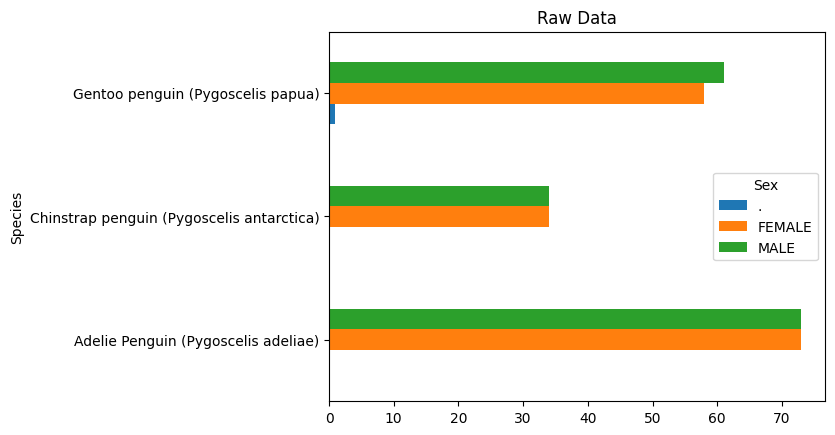

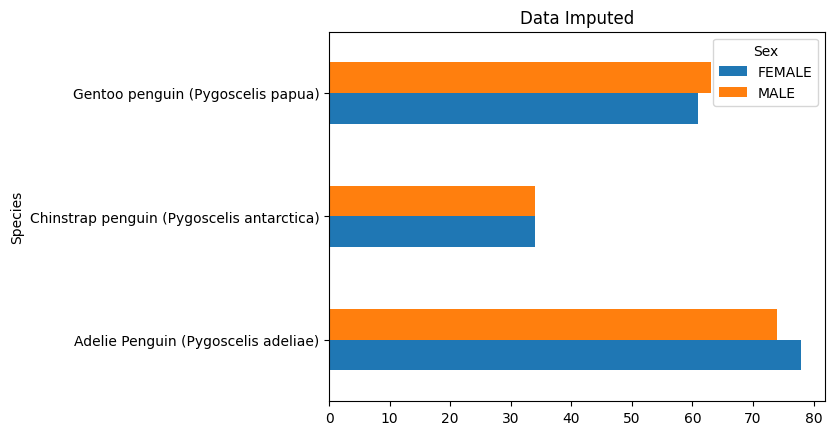

In [27]:
pd.crosstab(index=df.Species, columns=df.Sex).plot(kind='barh')
plt.title('Raw Data')
plt.show()

pd.crosstab(index=df_imputed.Species, columns=df_imputed.Sex).plot(kind='barh')
plt.title('Data Imputed')
plt.show()

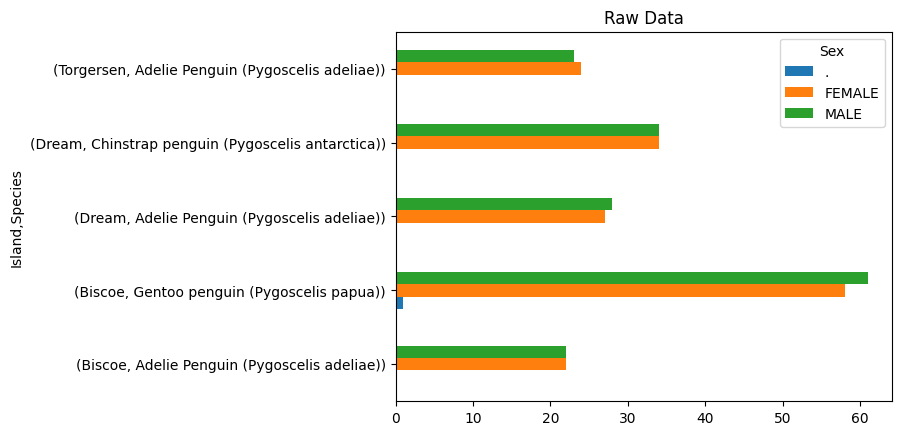

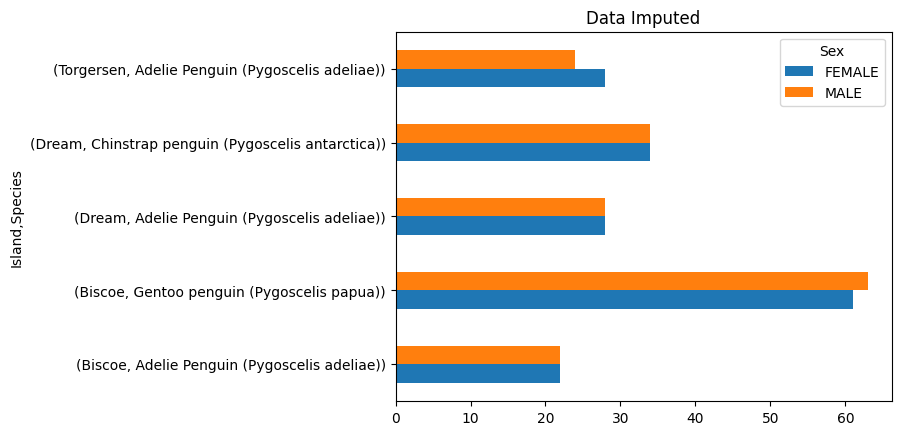

In [28]:
pd.crosstab(index=[df.Island, df.Species], columns=df.Sex).plot(kind='barh')
plt.title('Raw Data')
plt.show()

pd.crosstab(index=[df_imputed.Island, df_imputed.Species], columns=df_imputed.Sex).plot(kind='barh')
plt.title('Data Imputed')
plt.show()

Dari plot di atas ternyata untuk distribusi Sex terbilang sama rata, hampir di setiap species, kecuali di Gentoo, tapi hal itu menjadikan jumlah sex MALE lebih banyak

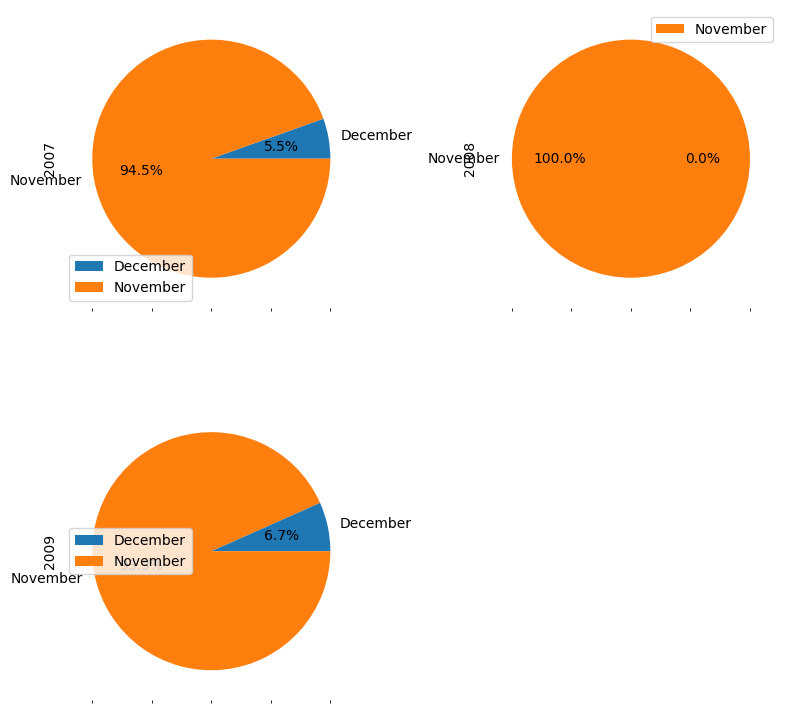

In [29]:
# df.pivot_table(index='Date Egg', values='Body Mass (g)')
pd.crosstab(index=df['Months'], columns=df['Years']).plot(kind='pie', subplots=True, layout=(2, 2), figsize=(8,8), autopct='%.1f%%')
plt.tight_layout()
plt.show()

Pengambilan sample terbanyak pada bulan November tiap tahunnya

In [30]:
pd.crosstab(index=df['Years'], columns=df['Species'])

Species  Adelie Penguin (Pygoscelis adeliae)   
Years                                          
2007                                      50  \
2008                                      50   
2009                                      52   

Species  Chinstrap penguin (Pygoscelis antarctica)   
Years                                                
2007                                            26  \
2008                                            18   
2009                                            24   

Species  Gentoo penguin (Pygoscelis papua)  
Years                                       
2007                                    34  
2008                                    46  
2009                                    44

hasil tabel sama seperti pada study name dan years, ini menandakan benar bahwa pada study name PAL0708, mengacu pada tahun sampel diambil 

In [31]:
pd.crosstab(index=df['Days'], columns=df['Species'], margins=True, margins_name='count').sort_values(by='count')

Species    Adelie Penguin (Pygoscelis adeliae)   
Days                                             
Saturday                                    20  \
Wednesday                                    8   
Thursday                                    18   
Sunday                                      20   
Friday                                      36   
Monday                                      30   
Tuesday                                     20   
count                                      152   

Species    Chinstrap penguin (Pygoscelis antarctica)   
Days                                                   
Saturday                                          10  \
Wednesday                                         12   
Thursday                                           4   
Sunday                                             0   
Friday                                            16   
Monday                                            20   
Tuesday                                            6   
count                                             68   

Species    Gentoo penguin (Pygoscelis papua)  count  
Days                                                 
Saturday                                   0     30  
Wednesday                                 14     34  
Thursday                                  22     44  
Sunday                                    26     46  
Friday                                     8     60  
Monday                                    14     64  
Tuesday                                   40     66  
count                                    124    344

In [32]:
pd.crosstab(index=df['Days'], columns=[df['Species'], df['Clutch Completion']], margins=True, margins_name='count').sort_values(by='count')

Species           Adelie Penguin (Pygoscelis adeliae)        
Clutch Completion                                  No  Yes   
Days                                                         
Saturday                                            2   18  \
Wednesday                                           0    8   
Thursday                                            2   16   
Sunday                                              0   20   
Friday                                              0   36   
Monday                                              4   26   
Tuesday                                             6   14   
count                                              14  138   

Species           Chinstrap penguin (Pygoscelis antarctica)       
Clutch Completion                                        No Yes   
Days                                                              
Saturday                                                  2   8  \
Wednesday                                                 4   8   
Thursday                                                  0   4   
Sunday                                                    0   0   
Friday                                                    2  14   
Monday                                                    4  16   
Tuesday                                                   2   4   
count                                                    14  54   

Species           Gentoo penguin (Pygoscelis papua)      count  
Clutch Completion                                No  Yes        
Days                                                            
Saturday                                          0    0    30  
Wednesday                                         0   14    34  
Thursday                                          0   22    44  
Sunday                                            2   24    46  
Friday                                            0    8    60  
Monday                                            0   14    64  
Tuesday                                           6   34    66  
count                                             8  116   344

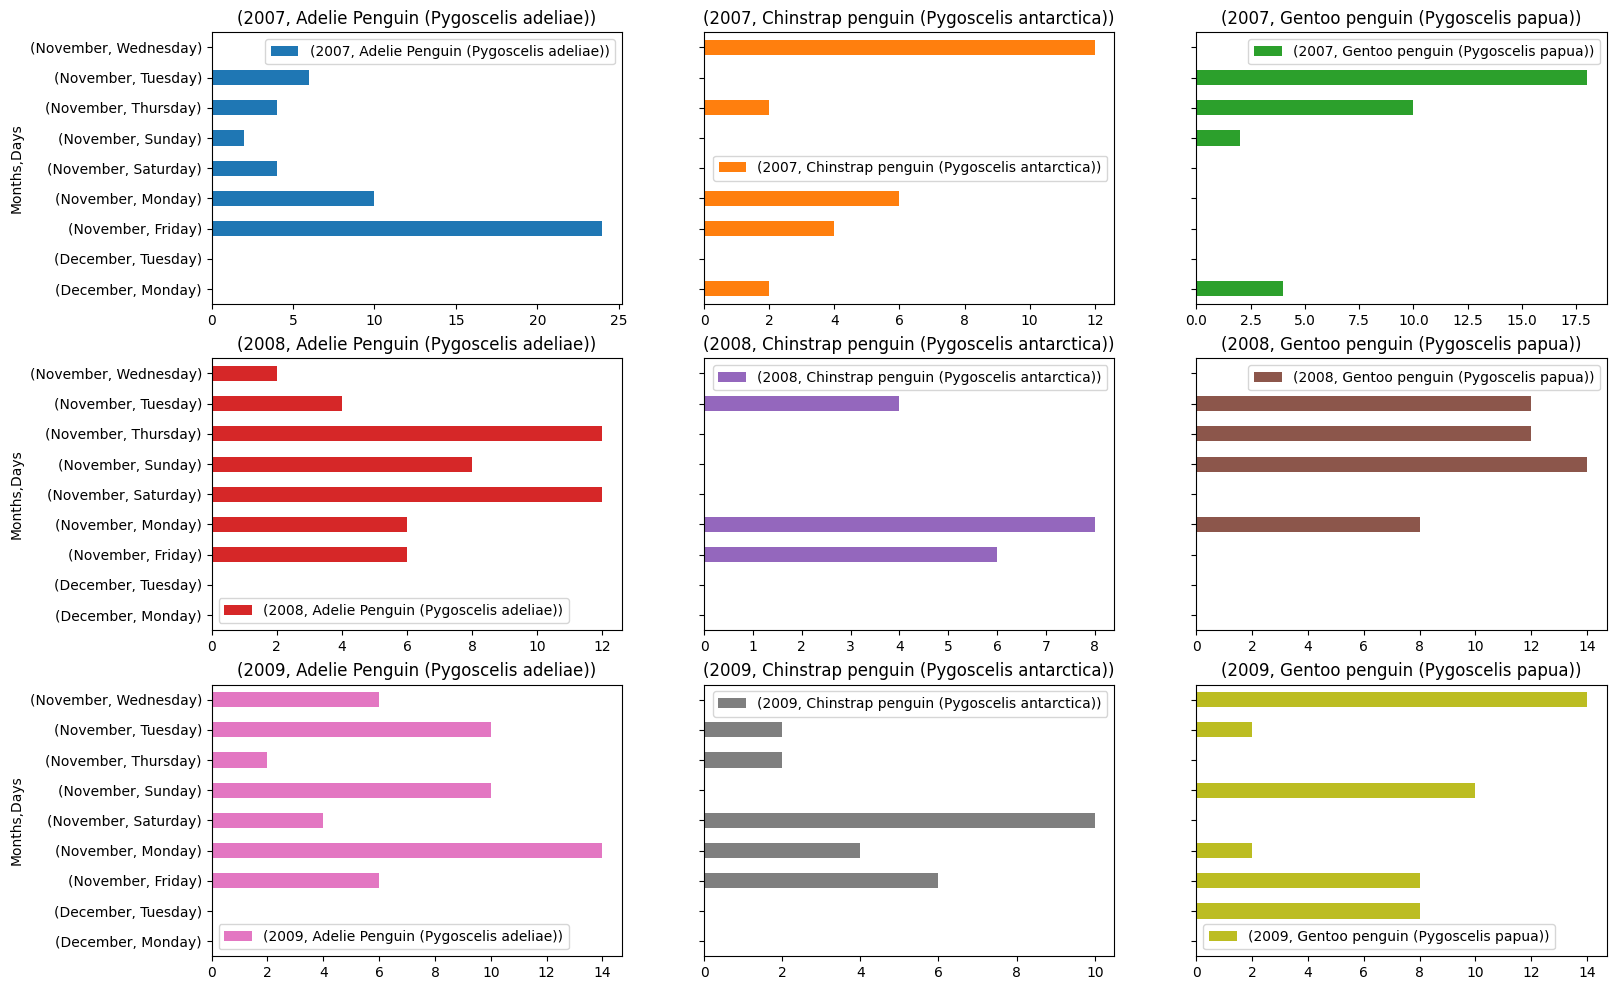

In [33]:
pd.crosstab(index=[df['Months'], df['Days']], columns=[df['Years'], df['Species']]).plot(kind='barh', subplots=True, layout=(3, 3), figsize=(18,12), sharex=False, sharey=True)
plt.show()

In [34]:
pd.crosstab(index=df['A values'], columns=df['Species'])

Species   Adelie Penguin (Pygoscelis adeliae)   
A values                                        
A1                                         76  \
A2                                         76   

Species   Chinstrap penguin (Pygoscelis antarctica)   
A values                                              
A1                                               34  \
A2                                               34   

Species   Gentoo penguin (Pygoscelis papua)  
A values                                     
A1                                       62  
A2                                       62

<Axes: xlabel='N values'>

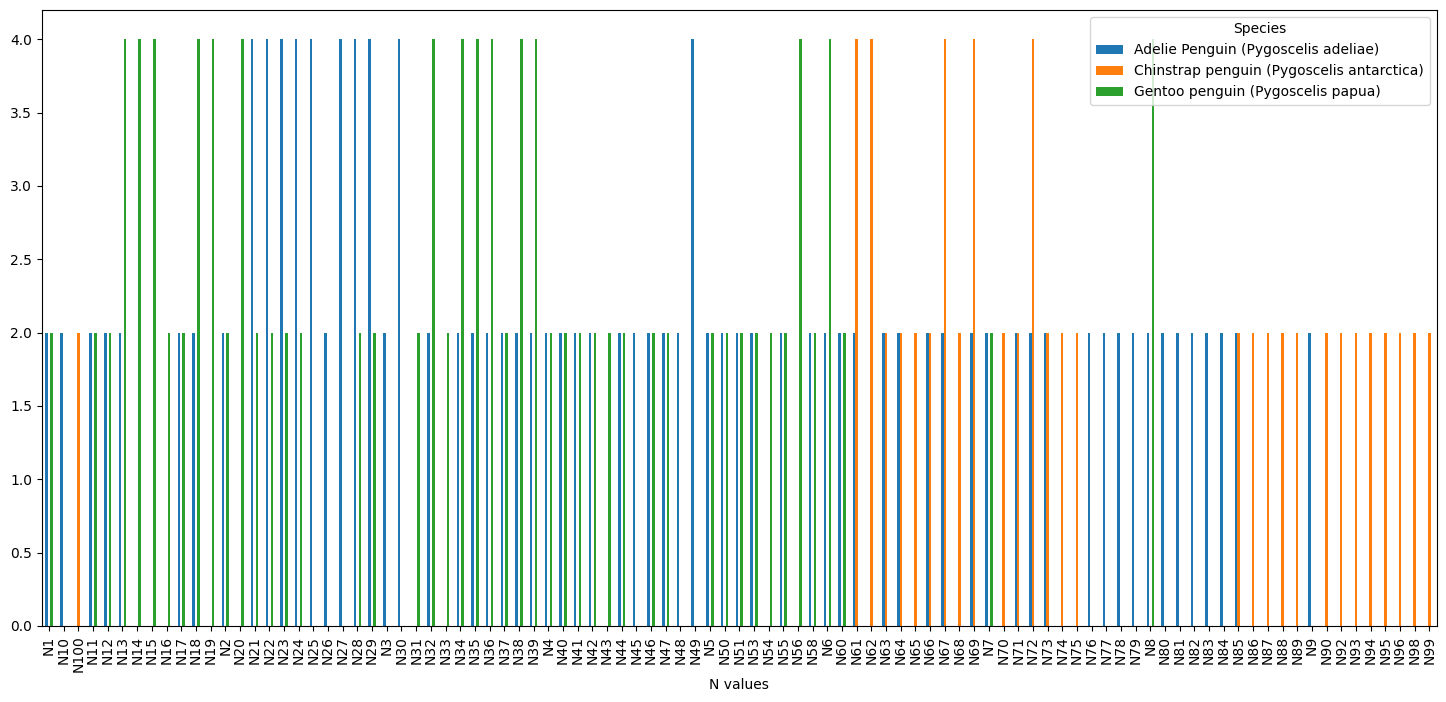

In [35]:
# import re

# def extract_number(element):
#     return int(re.search(r'\d+', element).group())
# get_N_df = df.sort_values(by='N values', key=lambda x: x.apply(extract_number))


pd.crosstab(index=df['N values'], columns=df['Species']).plot(kind='bar', figsize=(18,8))

In [36]:
sa.table_diagnose(data=df)

rows  columns  number  object  datetime  timedelta  category   
Count   344       21       8      12         1          0         0  \

       datetimetz  
Count           0

columns n null n unique           types   
0             studyName      0        3          object  \
1         Sample Number      0      152           int64   
2               Species      0        3          object   
3                Region      0        1          object   
4                Island      0        3          object   
5                 Stage      0        1          object   
6     Clutch Completion      0        2          object   
7              Date Egg      0       50  datetime64[ns]   
8    Culmen Length (mm)      2      164         float64   
9     Culmen Depth (mm)      2       80         float64   
10  Flipper Length (mm)      2       55         float64   
11        Body Mass (g)      2       94         float64   
12                  Sex     10        3          object   
13    Delta 15 N (o/oo)     14      330         float64   
14    Delta 13 C (o/oo)     13      331         float64   
15             Comments    318        7          object   
16                 Days      0        7          object   
17               Months      0        2          object   
18                Years      0        3           int32   
19             N values      0       95          object   
20             A values      0        2          object   

                                          unique vals percentages null (%)   
0                         [PAL0708, PAL0809, PAL0910]                  0.0  \
1                                                 NaN                  0.0   
2   [Adelie Penguin (Pygoscelis adeliae), Chinstra...                  0.0   
3                                            [Anvers]                  0.0   
4                          [Torgersen, Biscoe, Dream]                  0.0   
5                                [Adult, 1 Egg Stage]                  0.0   
6                                           [Yes, No]                  0.0   
7                                                 NaN                  0.0   
8                                                 NaN             0.581395   
9                                                 NaN             0.581395   
10                                                NaN             0.581395   
11                                                NaN             0.581395   
12                             [MALE, FEMALE, nan, .]             2.906977   
13                                                NaN             4.069767   
14                                                NaN              3.77907   
15  [Not enough blood for isotopes., nan, Adult no...             92.44186   
16  [Sunday, Friday, Thursday, Monday, Saturday, T...                  0.0   
17                               [November, December]                  0.0   
18                                 [2007, 2008, 2009]                  0.0   
19                                                NaN                  0.0   
20                                           [A1, A2]                  0.0   

    skewness                          std                  min   
0        NaN                          NaN                  NaN  \
1   0.351402                    40.430199                    1   
2        NaN                          NaN                  NaN   
3        NaN                          NaN                  NaN   
4        NaN                          NaN                  NaN   
5        NaN                          NaN                  NaN   
6        NaN                          NaN                  NaN   
7        NaN  298 days 19:50:44.783416800  2007-11-09 00:00:00   
8   0.053118                     5.459584                 32.1   
9  -0.143465                     1.974793                 13.1   
10  0.345682                    14.061714                172.0   
11  0.470329                   801.954536               2700.0   
12       NaN                          NaN                  NaN   
13  0.238981                      0.55177               7.6322   
14  0.3377

## Analisis kenapa hasil mode seperti itu (membandingkan dengan tipe data numerik yang lain)

<Figure size 640x480 with 0 Axes>

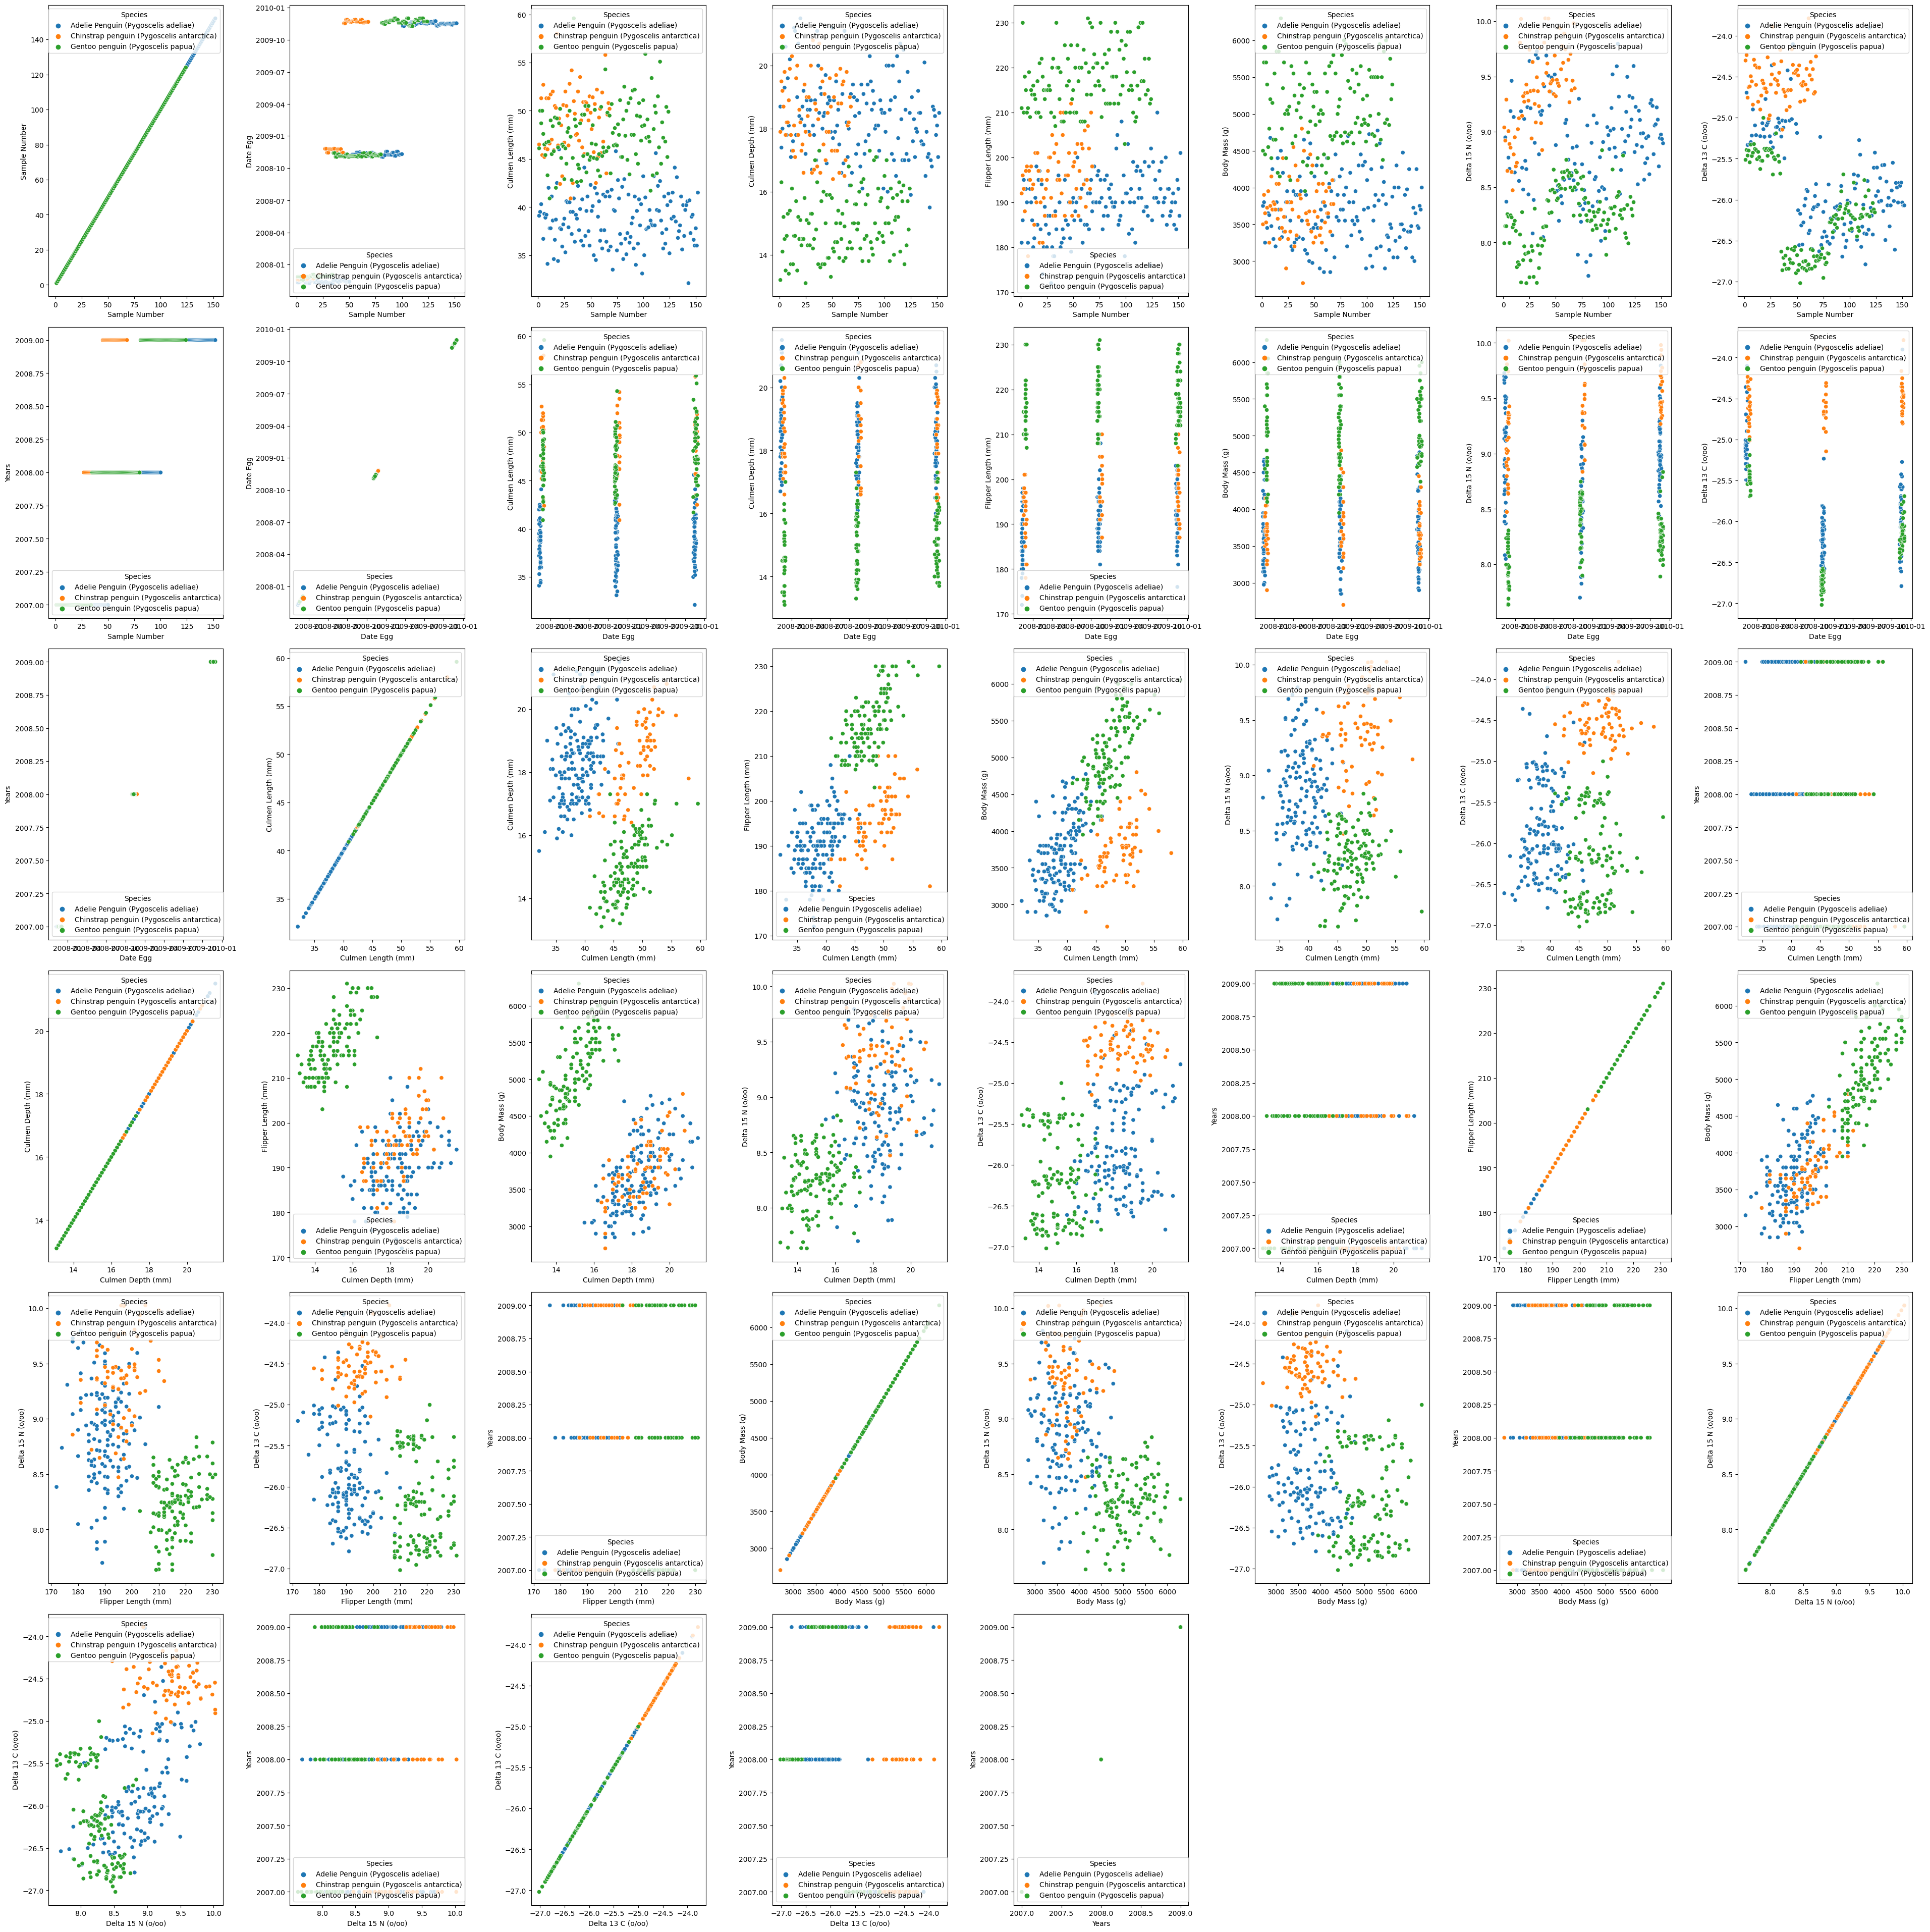

In [37]:
fp.plot_features(data=df, plot_type='scatter', hue='Species')

In [38]:
feature_cols_observe = ['Culmen Length (mm)',	'Culmen Depth (mm)',	'Flipper Length (mm)',	'Body Mass (g)',	'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
print('Hasil data yang belum diimputasi')
display(df.pivot_table(values=feature_cols_observe, index='Species', columns='Sex', aggfunc='mean'))
print('Hasil data yang telah diimputasi')
display(df_imputed.pivot_table(values=feature_cols_observe, index='Species', columns='Sex', aggfunc='mean'))

Hasil data yang belum diimputasi


Body Mass (g)                
Sex                                                   .       FEMALE   
Species                                                                
Adelie Penguin (Pygoscelis adeliae)                 NaN  3368.835616  \
Chinstrap penguin (Pygoscelis antarctica)           NaN  3527.205882   
Gentoo penguin (Pygoscelis papua)                4875.0  4679.741379   

                                                       Culmen Depth (mm)   
Sex                                               MALE                 .   
Species                                                                    
Adelie Penguin (Pygoscelis adeliae)        4043.493151               NaN  \
Chinstrap penguin (Pygoscelis antarctica)  3938.970588               NaN   
Gentoo penguin (Pygoscelis papua)          5484.836066              15.7   

                                                                  
Sex                                           FEMALE       MALE   
Species                                                           
Adelie Penguin (Pygoscelis adeliae)        17.621918  19.072603  \
Chinstrap penguin (Pygoscelis antarctica)  17.588235  19.252941   
Gentoo penguin (Pygoscelis papua)          14.237931  15.718033   

                                          Culmen Length (mm)              
Sex                                                        .     FEMALE   
Species                                                                   
Adelie Penguin (Pygoscelis adeliae)                      NaN  37.257534  \
Chinstrap penguin (Pygoscelis antarctica)                NaN  46.573529   
Gentoo penguin (Pygoscelis papua)                       44.5  45.563793   

                                                     Delta 13 C (o/oo)   
Sex                                             MALE                 .   
Species                                                                  
Adelie Penguin (Pygoscelis adeliae)        40.390411               NaN  \
Chinstrap penguin (Pygoscelis antarctica)  51.094118               NaN   
Gentoo penguin (Pygoscelis papua)          49.473770         -26.18444   

                                                                  
Sex                                           FEMALE       MALE   
Species                                                           
Adelie Penguin (Pygoscelis adeliae)       -25.794158 -25.833813  \
Chinstrap penguin (Pygoscelis antarctica) -24.565405 -24.527679   
Gentoo penguin (Pygoscelis papua)         -26.197205 -26.170608   

                                          Delta 15 N (o/oo)             
Sex                                                       .    FEMALE   
Species                                                                 
Adelie Penguin (Pygoscelis adeliae)                     NaN  8.793275  \
Chinstrap penguin (Pygoscelis antarctica)               NaN  9.250962   
Gentoo penguin (Pygoscelis papua)                   8.04111  8.193405   

                                                    Flipper Length (mm)   
Sex                                            MALE                   .   
Species                                                                   
Adelie Penguin (Pygoscelis adeliae)        8.928437                 NaN  \
Chinstrap penguin (Pygoscelis antarctica)  9.464535                 NaN   
Gentoo penguin (Pygoscelis papua)          8.303429               217.0   

                                                                   
Sex                                            FEMALE        MALE  
Species                                                            
Adelie Penguin (Pygoscelis adeliae)        187.794521  192.410959  
Chinstrap penguin (Pygoscelis antarctica)  191.735294  199.911765  
Gentoo penguin (Pygoscelis papua)          212.706897  221.540984

Hasil data yang telah diimputasi


Body Mass (g)                
Sex                                              FEMALE         MALE   
Species                                                                
Adelie Penguin (Pygoscelis adeliae)         3368.269231  4046.283784  \
Chinstrap penguin (Pygoscelis antarctica)   3527.205882  3938.970588   
Gentoo penguin (Pygoscelis papua)           4683.401639  5453.174603   

                                          Culmen Depth (mm)              
Sex                                                  FEMALE       MALE   
Species                                                                  
Adelie Penguin (Pygoscelis adeliae)               17.646795  19.087838  \
Chinstrap penguin (Pygoscelis antarctica)         17.588235  19.252941   
Gentoo penguin (Pygoscelis papua)                 14.229508  15.695238   

                                          Culmen Length (mm)              
Sex                                                   FEMALE       MALE   
Species                                                                   
Adelie Penguin (Pygoscelis adeliae)                37.250000  40.412162  \
Chinstrap penguin (Pygoscelis antarctica)          46.573529  51.094118   
Gentoo penguin (Pygoscelis papua)                  45.626230  49.315873   

                                          Delta 13 C (o/oo)              
Sex                                                  FEMALE       MALE   
Species                                                                  
Adelie Penguin (Pygoscelis adeliae)              -25.734076 -25.751333  \
Chinstrap penguin (Pygoscelis antarctica)        -24.565405 -24.527679   
Gentoo penguin (Pygoscelis papua)                -26.207606 -26.149856   

                                          Delta 15 N (o/oo)             
Sex                                                  FEMALE      MALE   
Species                                                                 
Adelie Penguin (Pygoscelis adeliae)                8.800081  8.951902  \
Chinstrap penguin (Pygoscelis antarctica)          9.250962  9.467350   
Gentoo penguin (Pygoscelis papua)                  8.195408  8.288618   

                                          Flipper Length (mm)              
Sex                                                    FEMALE        MALE  
Species                                                                    
Adelie Penguin (Pygoscelis adeliae)                187.705128  192.378378  
Chinstrap penguin (Pygoscelis antarctica)          191.735294  199.911765  
Gentoo penguin (Pygoscelis papua)                  212.811475  221.380952

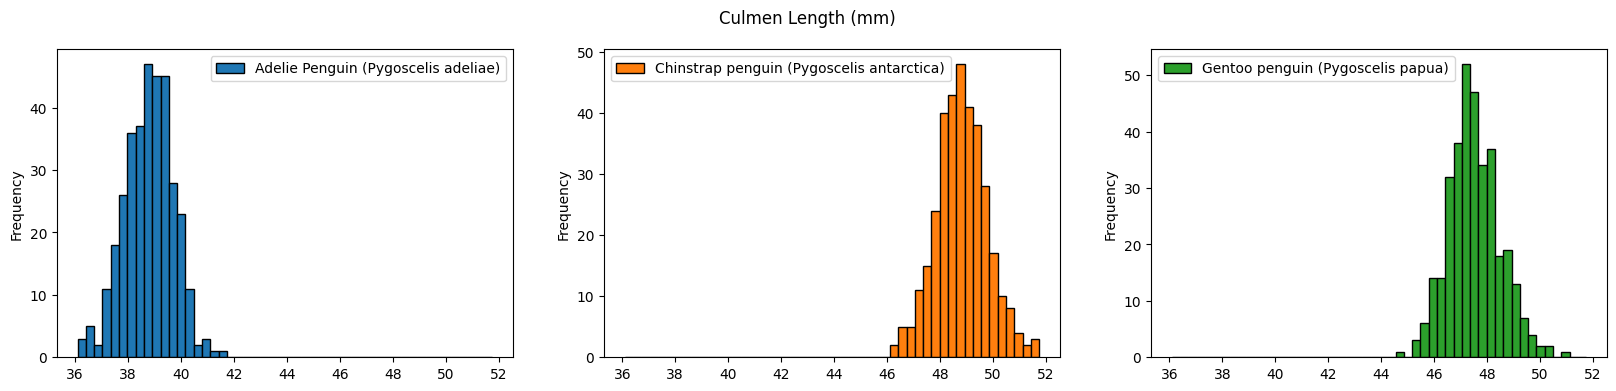

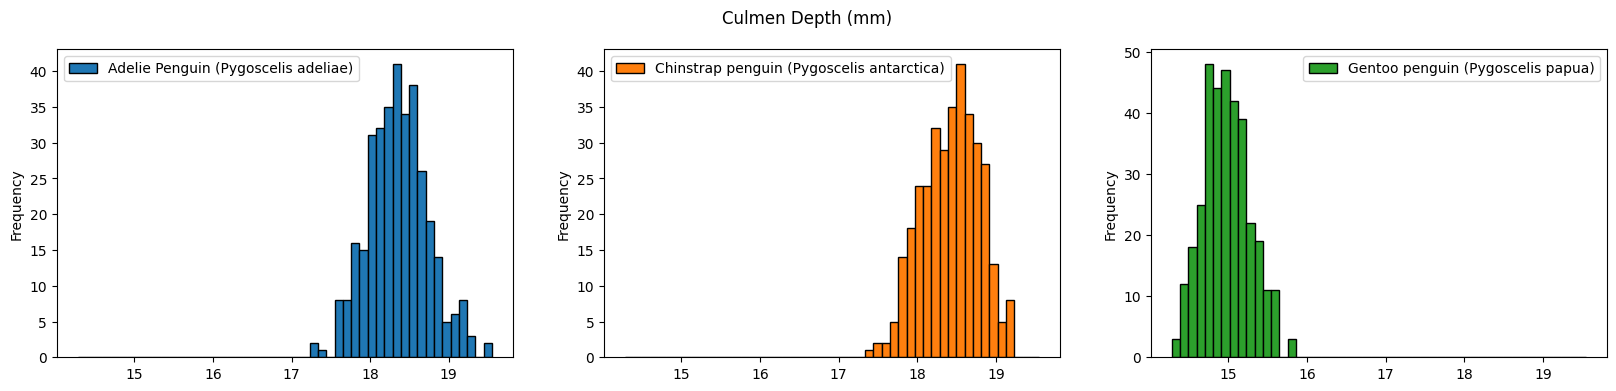

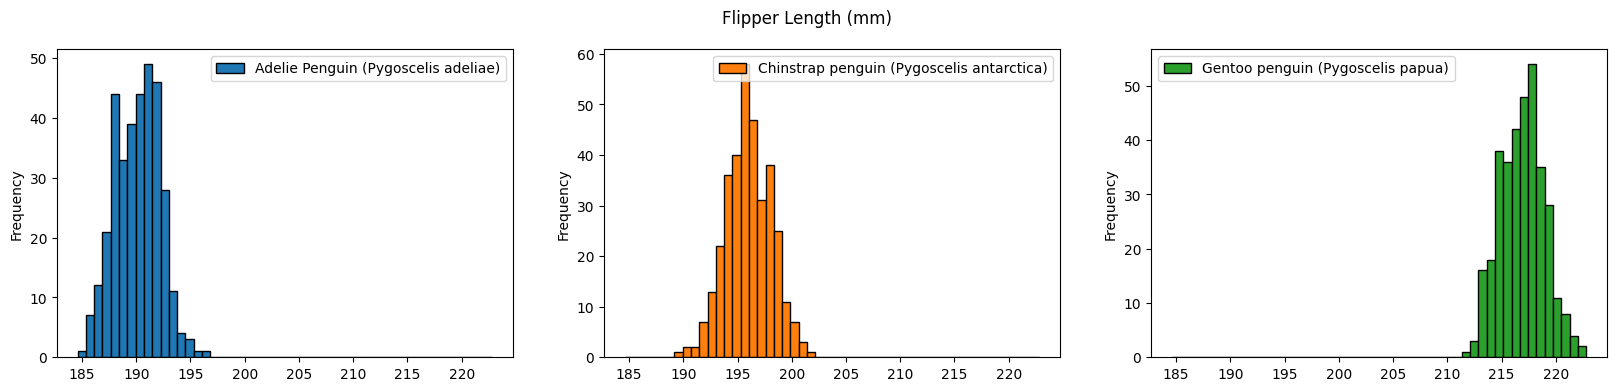

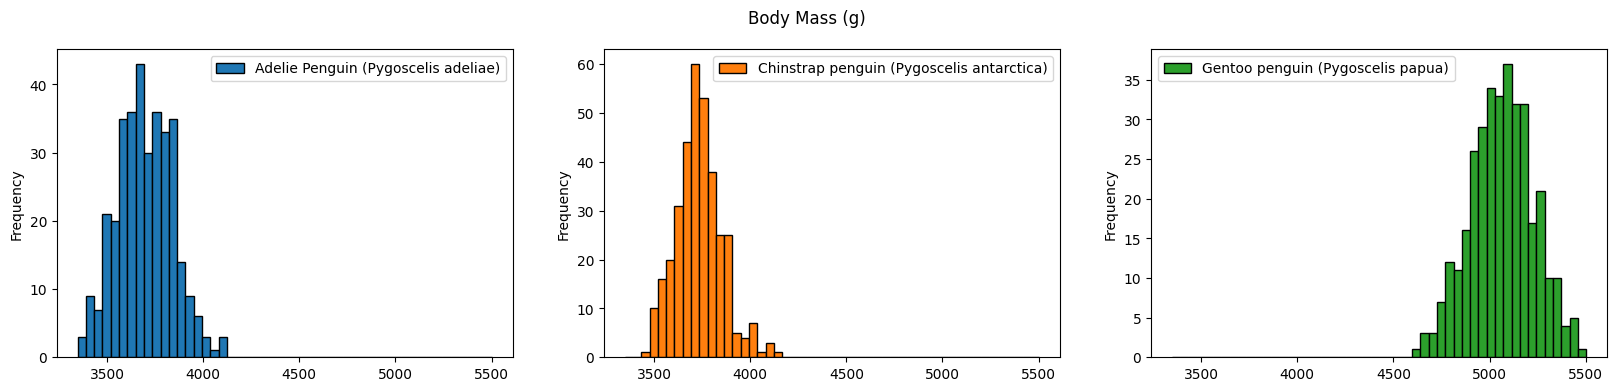

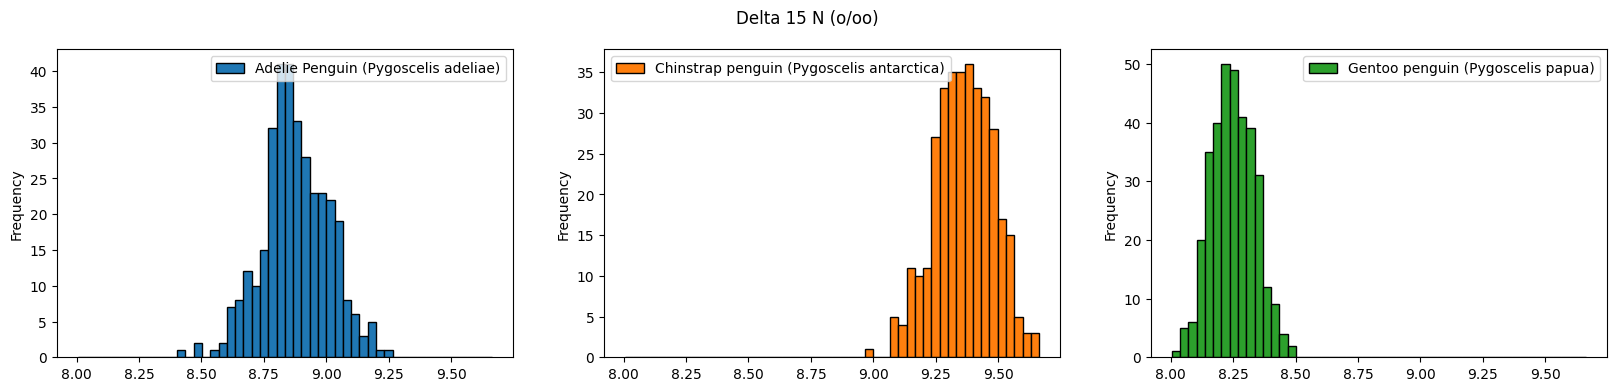

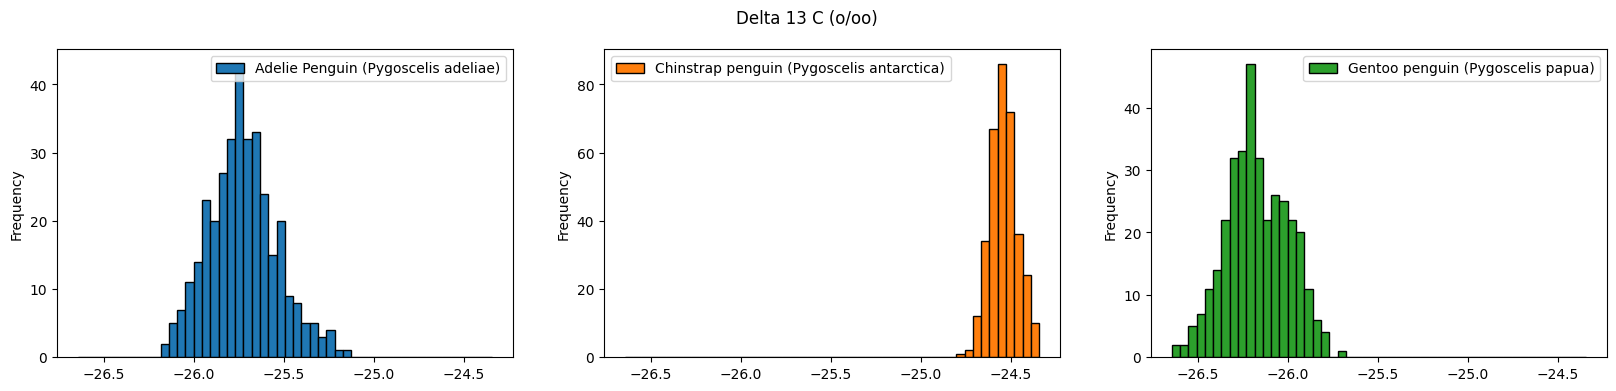

In [39]:
fp.plot_histograms(data=df_imputed, target_col='Species', feature_cols=feature_cols_observe, sample_mean=10, bins=50, subplots=True, layout=(1, 3), figsize=(20, 4), edgecolor='black')

Dari hasil plot histogram maupun boxplot menunjukkan bahwa data terdistribusi normal, sehingga untuk pengaruh outlier tidak begitu besar, sehingga kita bisa mengambil kesimpulan baik, untuk mengetahui masing masing species, terhadap ciri-ciri khusus yang dimilikinya

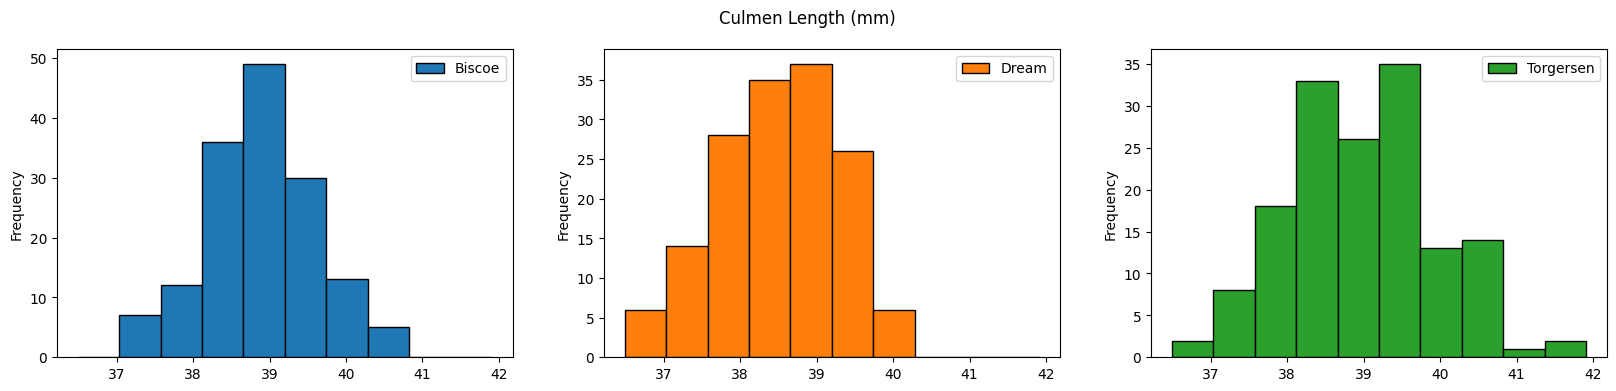

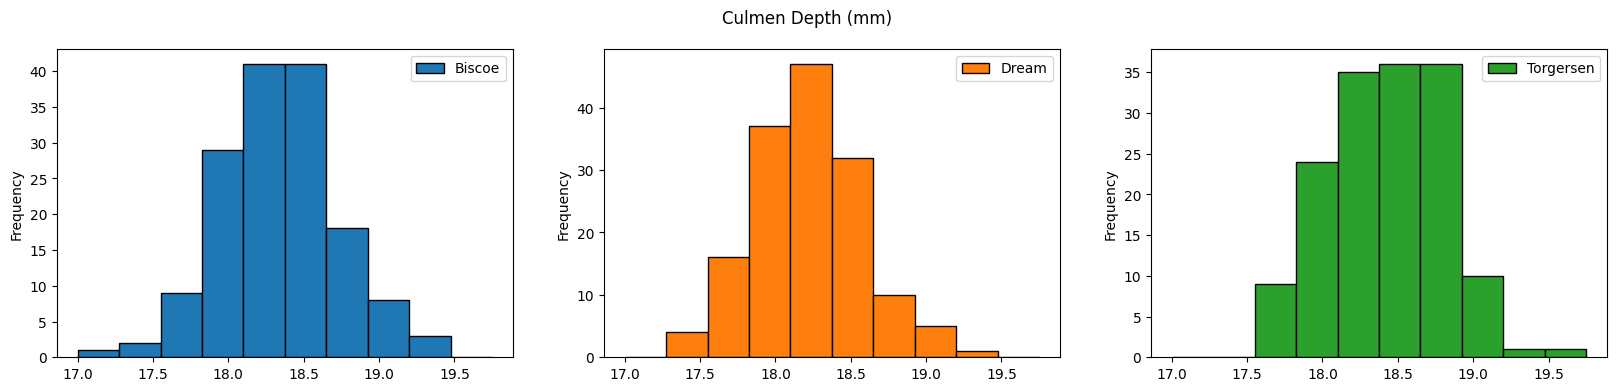

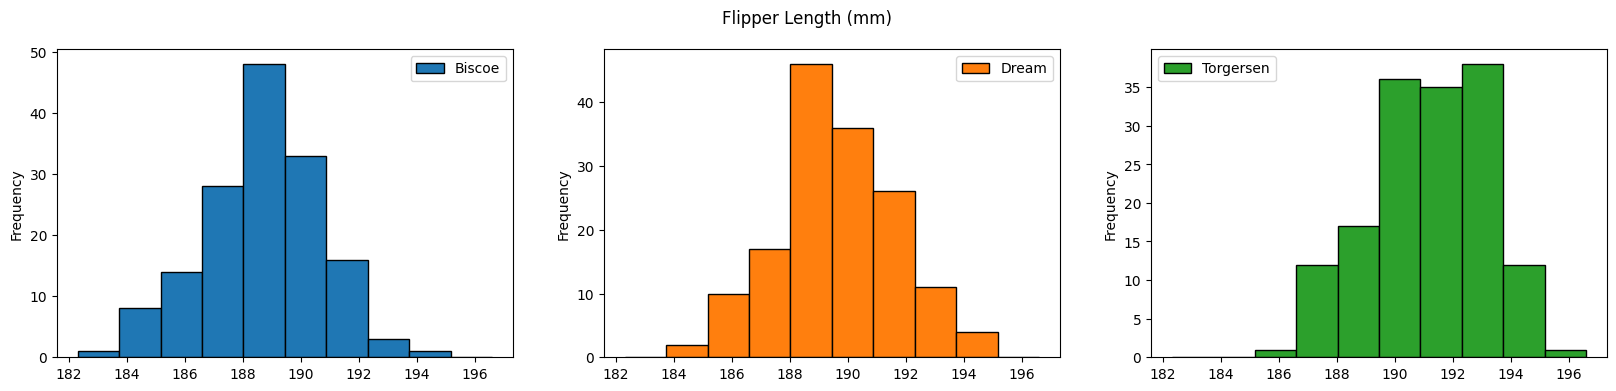

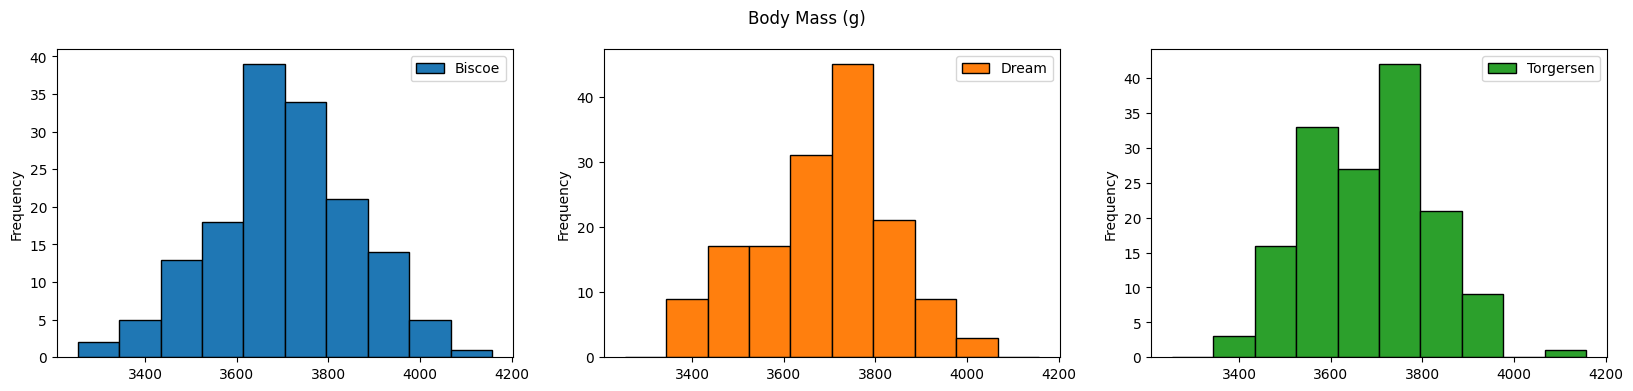

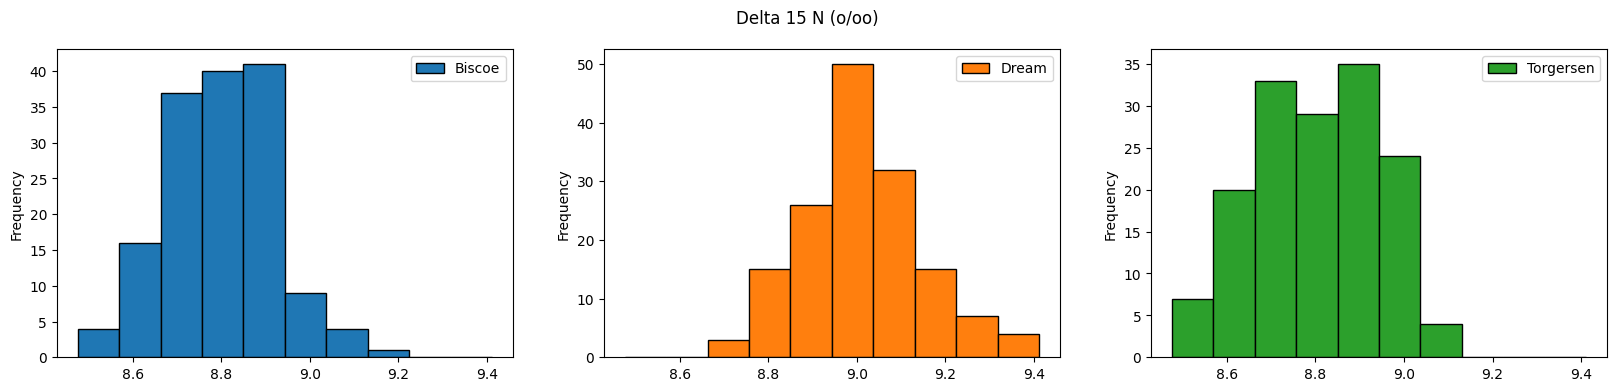

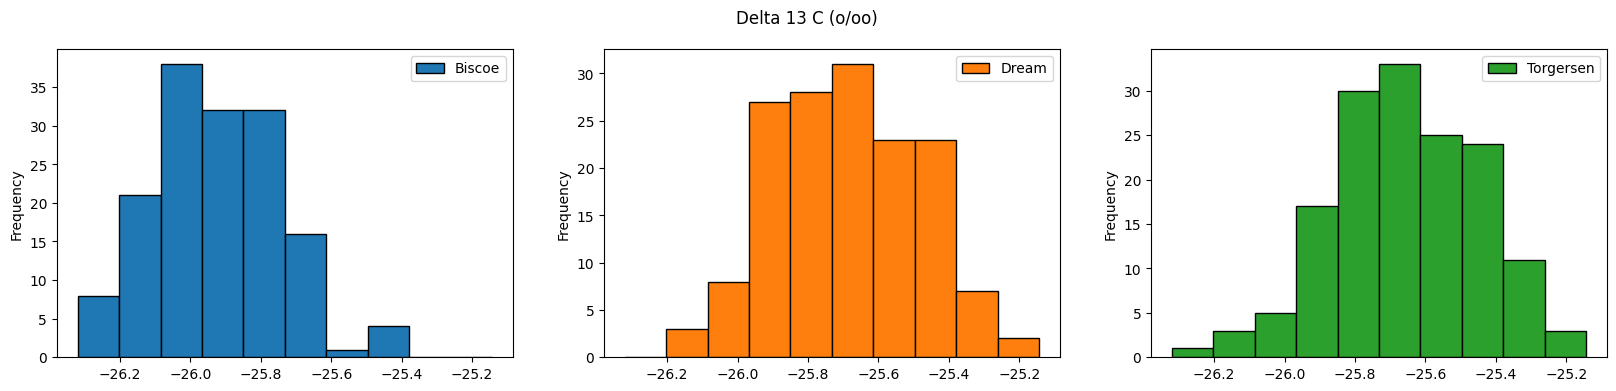

In [40]:
by_species_adelie = df_imputed[df_imputed['Species'] == 'Adelie Penguin (Pygoscelis adeliae)']
fp.plot_histograms(by_species_adelie, 'Island', feature_cols_observe, sample_mean=10, bins=10, subplots=True, layout=(1, 3), figsize=(20, 4), edgecolor='black')

berdasarkan histograms di atas bahwa untuk ciri-ciri pada setiap penguin adelie di setiap wilayah tidak begitu terlihat perbedaan yang signifikan, rata-rata untuk species Adelie di setiap tempat memiliki porsi badan yang sama.

<div style="display: flex; justify-content: space-around">
  <div style="text-align:center;">
    <p>Adelie</p>
    <img src="./assets/adelie.jpeg" alt="Adelie" width="300px" height="300px">
  </div>
  <div style="text-align:center;">
    <p>Chinstrap</p>
    <img src="./assets/chinstrap.jpeg" alt="Chinstrap" width="300px" height="300px">
  </div>
  <div style="text-align:center;">
    <p>Gentoo</p>
    <img src="./assets/gentoo.jpg" alt="Gentoo" width="300px" height="300px">
  </div>
</div>

Tabel tersebut menunjukkan perbedaan ukuran antara jantan dan betina dari tiga spesies penguin, yaitu Adélie, Chinstrap, dan Gentoo. Spesies penguin ini termasuk dalam genus Pygoscelis, yang berarti \"berpinggang\" dalam bahasa Yunani, karena mereka memiliki pinggang yang sempit dan fleksibel. Spesies penguin ini hidup di daerah sub-Antartika dan Antartika, dan memiliki pola warna hitam dan putih yang khas¹.

Spesies penguin ini memiliki dimorfisme seksual, yaitu adanya perbedaan ciri-ciri fisik antara jantan dan betina. Dimorfisme seksual dapat disebabkan oleh berbagai faktor, seperti seleksi seksual, persaingan antar jantan, peran parental, dan adaptasi terhadap lingkungan. Secara umum, jantan lebih besar dan berat daripada betina, terutama pada ukuran paruh (culmen) dan sirip (flipper). Ukuran paruh dapat berpengaruh pada kemampuan memangsa dan bertahan hidup di lingkungan yang keras. Ukuran sirip dapat berpengaruh pada kecepatan dan manuverabilitas dalam berenang.

Berikut adalah rincian perbedaan ukuran antara jantan dan betina dari masing-masing spesies penguin:

- Spesies Adélie memiliki tubuh yang lebih kecil daripada spesies lainnya. Jantan rata-rata memiliki massa tubuh sekitar 4.0 kg, sedangkan betina sekitar 3.3 kg. Jantan juga memiliki culmen yang lebih panjang (sekitar 4.0 cm) dan lebih dalam (sekitar 1.9 cm) daripada betina (sekitar 3.7 cm dan 1.7 cm). Sirip jantan juga lebih panjang (sekitar 19.2 cm) daripada sirip betina (sekitar 18.7 cm).
- Spesies Chinstrap memiliki tubuh yang sedikit lebih besar daripada spesies Adélie. Jantan rata-rata memiliki massa tubuh sekitar 3.93 kg, sedangkan betina sekitar 3.5 kg. Jantan juga memiliki culmen yang lebih panjang (sekitar 5.1 cm) dan lebih dalam (sekitar 1.9 cm) daripada betina (sekitar 4.6 cm dan 1.7 cm). Sirip jantan juga lebih panjang (sekitar 20.0 cm) daripada sirip betina (sekitar 19.1 cm).
- Spesies Gentoo memiliki tubuh yang paling besar di antara spesies lainnya. Jantan rata-rata memiliki massa tubuh sekitar 5.4 kg, sedangkan betina sekitar 4.8 kg. Jantan juga memiliki culmen yang lebih panjang (sekitar 4.9 cm) dan lebih dalam (sekitar 1.5 cm) daripada betina (sekitar 4.5 cm dan 1.4 cm). Sirip jantan juga lebih panjang (sekitar 22.1 cm) daripada sirip betina (sekitar 21.2 cm).

Dari ketiga spesies tersebut, spesies Gentoo adalah yang paling berat, spesies Chinstrap adalah yang memiliki culmen yang paling panjang, dan spesies Gentoo adalah yang memiliki sirip yang paling panjang.

Untuk membuat gambar di atas memiliki ukuran yang sama, Anda dapat menggunakan HTML atau CSS untuk memperbaiki sizenya. Berikut adalah contoh kode HTML untuk menampilkan gambar dengan lebar 300 pixel:

Mempelajari lebih dalam mengenai Uji Hipotesis, khususnya untuk ANOVA, yaitu belajar mengenai permutasi test, asumsi-asumsi yang diperlukan agar dapat melakukan pengujian ANOVA, seperti normalitas, Homogenitas varians, dan Independensi sampel

In [41]:
data_imputer = DataImputer()
downsampled_dataframes = data_imputer.imbalance_data(df_imputed, 'Species', upsample=False, random_state=42)
downsampled_dataframes['Species'].value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          68
Gentoo penguin (Pygoscelis papua)            68
Chinstrap penguin (Pygoscelis antarctica)    68
Name: count, dtype: int64

In [42]:
sa.feature_relationship_analysis(data=downsampled_dataframes.drop(columns=['Comments']), target='Species')

Significant       p_value
Sample Number (anova)          22.181014  1.974990e-09
Culmen Length (mm) (anova)    248.166143  5.075824e-55
Culmen Depth (mm) (anova)     230.213861  1.029730e-52
Flipper Length (mm) (anova)   287.629973  1.060431e-59
Body Mass (g) (anova)         235.299270  2.221644e-53
Delta 15 N (o/oo) (anova)     161.169184  1.712202e-42
Delta 13 C (o/oo) (anova)     214.348924  1.440180e-50
Years (anova)                   0.317221  7.285338e-01
studyName (chi2)                3.574714  4.666093e-01
Species (chi2)                408.000000  5.196125e-87
Region (chi2)                   0.000000  1.000000e+00
Island (chi2)                 208.609458  5.290292e-44
Stage (chi2)                    0.000000  1.000000e+00
Clutch Completion (chi2)       10.682681  4.789447e-03
Sex (chi2)                      0.511032  7.745168e-01
Days (chi2)                    57.973413  5.270382e-08
Months (chi2)                   5.621465  6.016091e-02
N values (chi2)               329.900000  6.347524e-13
A values (chi2)                 0.511032  7.745168e-01

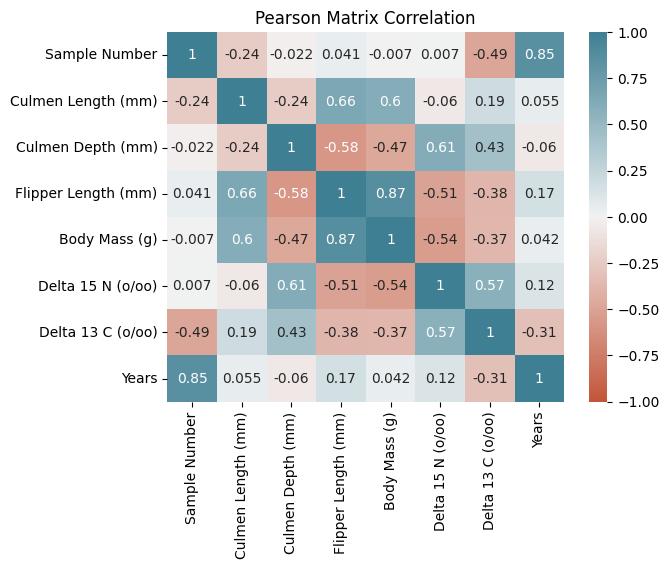

In [43]:
fp.numeric_matrix_corr(data=df, vmin=-1, vmax=1)

Pada matriks korelasi di atas, menunjukkan bahwa pada saya dan massa badan memiliki korelasi positif sebesar 0.87, artinya bahwa semakin besar sayap maka mempengaruhi massa pada penguin

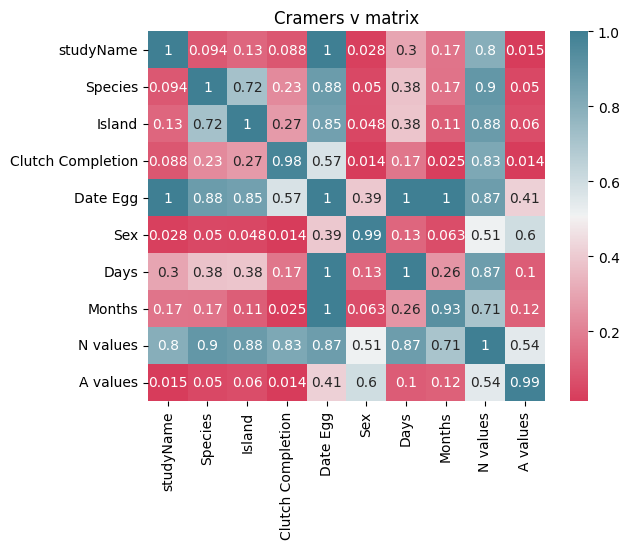

In [44]:
fp.cramers_v_matrix(data=downsampled_dataframes.drop(columns=['Comments']), cmap=sns.diverging_palette(5, 220, as_cmap=True))

In [45]:
df_tukey = sa.tukey_hsd_test(data=downsampled_dataframes, target='Species', alpha=0.05)

In [46]:
df_tukey

group1   
Sample Number              Adelie Penguin (Pygoscelis adeliae)  \
Sample Number              Adelie Penguin (Pygoscelis adeliae)   
Sample Number        Chinstrap penguin (Pygoscelis antarctica)   
Culmen Length (mm)         Adelie Penguin (Pygoscelis adeliae)   
Culmen Length (mm)         Adelie Penguin (Pygoscelis adeliae)   
Culmen Length (mm)   Chinstrap penguin (Pygoscelis antarctica)   
Culmen Depth (mm)          Adelie Penguin (Pygoscelis adeliae)   
Culmen Depth (mm)          Adelie Penguin (Pygoscelis adeliae)   
Culmen Depth (mm)    Chinstrap penguin (Pygoscelis antarctica)   
Flipper Length (mm)        Adelie Penguin (Pygoscelis adeliae)   
Flipper Length (mm)        Adelie Penguin (Pygoscelis adeliae)   
Flipper Length (mm)  Chinstrap penguin (Pygoscelis antarctica)   
Body Mass (g)              Adelie Penguin (Pygoscelis adeliae)   
Body Mass (g)              Adelie Penguin (Pygoscelis adeliae)   
Body Mass (g)        Chinstrap penguin (Pygoscelis antarctica)   
Delta 15 N (o/oo)          Adelie Penguin (Pygoscelis adeliae)   
Delta 15 N (o/oo)          Adelie Penguin (Pygoscelis adeliae)   
Delta 15 N (o/oo)    Chinstrap penguin (Pygoscelis antarctica)   
Delta 13 C (o/oo)          Adelie Penguin (Pygoscelis adeliae)   
Delta 13 C (o/oo)          Adelie Penguin (Pygoscelis adeliae)   
Delta 13 C (o/oo)    Chinstrap penguin (Pygoscelis antarctica)   
Years                      Adelie Penguin (Pygoscelis adeliae)   
Years                      Adelie Penguin (Pygoscelis adeliae)   
Years                Chinstrap penguin (Pygoscelis antarctica)   

                                                        group2  reject  
Sample Number        Chinstrap penguin (Pygoscelis antarctica)    True  
Sample Number                Gentoo penguin (Pygoscelis papua)   False  
Sample Number                Gentoo penguin (Pygoscelis papua)    True  
Culmen Length (mm)   Chinstrap penguin (Pygoscelis antarctica)    True  
Culmen Length (mm)           Gentoo penguin (Pygoscelis papua)    True  
Culmen Length (mm)           Gentoo penguin (Pygoscelis papua)   False  
Culmen Depth (mm)    Chinstrap penguin (Pygoscelis antarctica)   False  
Culmen Depth (mm)            Gentoo penguin (Pygoscelis papua)    True  
Culmen Depth (mm)            Gentoo penguin (Pygoscelis papua)    True  
Flipper Length (mm)  Chinstrap penguin (Pygoscelis antarctica)    True  
Flipper Length (mm)          Gentoo penguin (Pygoscelis papua)    True  
Flipper Length (mm)          Gentoo penguin (Pygoscelis papua)    True  
Body Mass (g)        Chinstrap penguin (Pygoscelis antarctica)   False  
Body Mass (g)                Gentoo penguin (Pygoscelis papua)    True  
Body Mass (g)                Gentoo penguin (Pygoscelis papua)    True  
Delta 15 N (o/oo)    Chinstrap penguin (Pygoscelis antarctica)    True  
Delta 15 N (o/oo)            Gentoo penguin (Pygoscelis papua)    True  
Delta 15 N (o/oo)            Gentoo penguin (Pygoscelis papua)    True  
Delta 13 C (o/oo)    Chinstrap penguin (Pygoscelis antarctica)    True  
Delta 13 C (o/oo)            Gentoo penguin (Pygoscelis papua)    True  
Delta 13 C (o/oo)            Gentoo penguin (Pygoscelis papua)    True  
Years                Chinstrap penguin (Pygoscelis antarctica)   False  
Years                        Gentoo penguin (Pygoscelis papua)   False  
Years                        Gentoo penguin (Pygoscelis papua)   False

kita bisa mengatakan bahwa untuk Chinstrap dan Gentoo memiliki perbedaan Body Mass (g) yang cukup signifikan dan Adelia dengan gentoo memilki perbedaan body mass yang cukup signifikan, sendangkan adelie dengan chinstrap tidak terlalu memiliki perbedaan yang cukup signifikan 

In [47]:
sa.table_diagnose(data=df_imputed)

rows  columns  number  object  datetime  timedelta  category   
Count   344       21       8      12         1          0         0  \

       datetimetz  
Count           0

columns n null n unique           types   
0             studyName      0        3          object  \
1         Sample Number      0      152           int64   
2               Species      0        3          object   
3                Region      0        1          object   
4                Island      0        3          object   
5                 Stage      0        1          object   
6     Clutch Completion      0        2          object   
7              Date Egg      0       50  datetime64[ns]   
8    Culmen Length (mm)      0      164         float64   
9     Culmen Depth (mm)      0       81         float64   
10  Flipper Length (mm)      0       56         float64   
11        Body Mass (g)      0       95         float64   
12                  Sex      0        2          object   
13    Delta 15 N (o/oo)      0      343         float64   
14    Delta 13 C (o/oo)      0      343         float64   
15             Comments    318        7          object   
16                 Days      0        7          object   
17               Months      0        2          object   
18                Years      0        3           int32   
19             N values      0       95          object   
20             A values      0        2          object   

                                          unique vals percentages null (%)   
0                         [PAL0708, PAL0809, PAL0910]                  0.0  \
1                                                 NaN                  0.0   
2   [Adelie Penguin (Pygoscelis adeliae), Chinstra...                  0.0   
3                                            [Anvers]                  0.0   
4                          [Torgersen, Biscoe, Dream]                  0.0   
5                                [Adult, 1 Egg Stage]                  0.0   
6                                           [Yes, No]                  0.0   
7                                                 NaN                  0.0   
8                                                 NaN                  0.0   
9                                                 NaN                  0.0   
10                                                NaN                  0.0   
11                                                NaN                  0.0   
12                                     [MALE, FEMALE]                  0.0   
13                                                NaN                  0.0   
14                                                NaN                  0.0   
15  [Not enough blood for isotopes., nan, Adult no...             92.44186   
16  [Sunday, Friday, Thursday, Monday, Saturday, T...                  0.0   
17                               [November, December]                  0.0   
18                                 [2007, 2008, 2009]                  0.0   
19                                                NaN                  0.0   
20                                           [A1, A2]                  0.0   

    skewness                          std                  min   
0        NaN                          NaN                  NaN  \
1   0.351402                    40.430199                    1   
2        NaN                          NaN                  NaN   
3        NaN                          NaN                  NaN   
4        NaN                          NaN                  NaN   
5        NaN                          NaN                  NaN   
6        NaN                          NaN                  NaN   
7        NaN  298 days 19:50:44.783416800  2007-11-09 00:00:00   
8   0.054384                     5.454038                 32.1   
9  -0.145181                     1.978015                 13.1   
10  0.343037                    14.044782                172.0   
11  0.467994                   801.789816               2700.0   
12       NaN                          NaN                  NaN   
13  0.218274                     0.552652               7.6322   
14  0.2766

In [48]:
df_imputed.drop(columns=['studyName', 'Sample Number', 'Region', 'Stage', 'Clutch Completion', 'Date Egg', 'Comments', 'Sex', 'Days', 'Months', 'Years', 'N values', 'A values'], inplace=True)

In [49]:
df_scaler = df_imputed.copy(deep=True) 
target = 'Species'
data_fixed, get_func = data_imputer.preprocess_data(df_scaler, target)
data_fixed

Species  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)   
0          0            0.254545           0.666667             0.152542  \
1          0            0.269091           0.511905             0.237288   
2          0            0.298182           0.583333             0.389831   
3          0            0.232727           0.660714             0.372881   
4          0            0.167273           0.738095             0.355932   
..       ...                 ...                ...                  ...   
339        2            0.541818           0.107143             0.720339   
340        2            0.534545           0.142857             0.728814   
341        2            0.665455           0.309524             0.847458   
342        2            0.476364           0.202381             0.677966   
343        2            0.647273           0.357143             0.694915   

     Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  Island_Biscoe   
0         0.291667           0.550450           0.719311            0.0  \
1         0.305556           0.550450           0.719311            0.0   
2         0.152778           0.307537           0.521692            0.0   
3         0.180556           0.390751           0.523048            0.0   
4         0.208333           0.473964           0.524404            0.0   
..             ...                ...                ...            ...   
339       0.607639           0.237951           0.262063            1.0   
340       0.597222           0.325630           0.272441            1.0   
341       0.847222           0.279730           0.302510            1.0   
342       0.694444           0.254993           0.278207            1.0   
343       0.750000           0.305736           0.267182            1.0   

     Island_Dream  Island_Torgersen  
0             0.0               1.0  
1             0.0               1.0  
2             0.0               1.0  
3             0.0               1.0  
4             0.0               1.0  
..            ...               ...  
339           0.0               0.0  
340           0.0               0.0  
341           0.0               0.0  
342           0.0               0.0  
343           0.0               0.0  

[344 rows x 10 columns]

In [50]:
from sklearn.model_selection import train_test_split

X = data_fixed.drop(columns=['Species'], axis='columns')
y = data_fixed['Species']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.20,
    stratify=y,
    random_state=42
)

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (275, 9)
y_train: (275,)
X_test: (69, 9)
y_test: (69,)


In [67]:
models, models_mean = sa.tuning_classifier_models(X_train, y_train, 15, CrossValidateParams={'scoring':'balanced_accuracy'})
models

DecisionTreeClassifier  RandomForestClassifier   
score balanced_accuracy 1                 0.936508                0.960317  \
score balanced_accuracy 2                 0.960784                0.980392   
score balanced_accuracy 3                 0.956272                0.944803   
score balanced_accuracy 4                 0.969136                0.981481   
score balanced_accuracy 5                 0.932950                1.000000   
score balanced_accuracy 6                 0.914042                0.955311   
score balanced_accuracy 7                 0.989583                0.989583   
score balanced_accuracy 8                 0.969697                1.000000   
score balanced_accuracy 9                 0.961111                0.988889   
score balanced_accuracy 10                0.950000                1.000000   
score balanced_accuracy 11                0.976190                0.976190   
score balanced_accuracy 12                0.965812                0.991453   
score balanced_accuracy 13                0.977778                0.988889   
score balanced_accuracy 14                0.975309                0.987654   
score balanced_accuracy 15                0.978495                0.978495   

                            LogisticRegression       SVM   
score balanced_accuracy 1             0.972222  1.000000  \
score balanced_accuracy 2             0.980392  0.980392   
score balanced_accuracy 3             0.967025  0.967025   
score balanced_accuracy 4             0.969136  1.000000   
score balanced_accuracy 5             0.988889  0.988889   
score balanced_accuracy 6             0.964835  0.964835   
score balanced_accuracy 7             0.989583  0.989583   
score balanced_accuracy 8             1.000000  1.000000   
score balanced_accuracy 9             0.988889  0.988889   
score balanced_accuracy 10            0.983333  1.000000   
score balanced_accuracy 11            0.952381  0.976190   
score balanced_accuracy 12            0.991453  0.991453   
score balanced_accuracy 13            0.988889  0.988889   
score balanced_accuracy 14            0.987654  0.987654   
score balanced_accuracy 15            0.989247  0.989247   

                            KNeighborsClassifier  GradientBoostingClassifier   
score balanced_accuracy 1               1.000000                    0.948413  \
score balanced_accuracy 2               0.970588                    0.970588   
score balanced_accuracy 3               1.000000                    0.989247   
score balanced_accuracy 4               0.987654                    0.981481   
score balanced_accuracy 5               1.000000                    0.922222   
score balanced_accuracy 6               0.990476                    0.964835   
score balanced_accuracy 7               0.989583                    0.989583   
score balanced_accuracy 8               1.000000                    1.000000   
score balanced_accuracy 9               0.988889                    0.961111   
score balanced_accuracy 10              1.000000                    0.966667   
score balanced_accuracy 11              0.976190                    0.941964   
score balanced_accuracy 12              0.991453                    0.982906   
score balanced_accuracy 13              0.988889                    0.977778   
score balanced_accuracy 14              0.987654                    0.987654   
score balanced_accuracy 15              0.978495                    0.978495   

                            AdaBoostClassifier  GaussianNB  RidgeClassifier   
score balanced_accuracy 1             0.908730    0.833333         1.000000  \
score balanced_accuracy 2             0.931373    0.852941         0.990196   
score balanced_accuracy 3             0.700358    0.795699         0.967025   
score balanced_accuracy 4             0.672840    0.802469         1.000000   
score balanced_accuracy 5             0.688889    0.777778         1.000000   
score balanced_accuracy 6             0.895238    0.819048     

In [68]:
models_mean

['DecisionTreeClassifier: 0.96091',
 'RandomForestClassifier: 0.98156',
 'LogisticRegression: 0.98093',
 'SVM: 0.98754',
 'KNeighborsClassifier: 0.98999',
 'GradientBoostingClassifier: 0.97086',
 'AdaBoostClassifier: 0.79158',
 'GaussianNB: 0.82223',
 'RidgeClassifier: 0.99146',
 'PassiveAggressiveClassifier: 0.99156']

In [57]:
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
    'loss': ['hinge'],
    'random_state': [42],
    'class_weight': [None, 'balanced']
}

cv_df = sa.perform_grid_search(
    X_train, 
    y_train, 
    PassiveAggressiveClassifier(),
    param_grid
)

In [58]:
cv_df.loc[0, 'best_params']

{'C': 0.1,
 'class_weight': None,
 'fit_intercept': False,
 'loss': 'hinge',
 'max_iter': 100,
 'random_state': 42,
 'tol': 0.0001}

In [60]:
model = PassiveAggressiveClassifier(
  C= 0.1,
  class_weight= None,
  fit_intercept= False,
  loss= 'hinge',
  max_iter= 100,
  random_state= 42,
  tol= 0.0001
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      1.00      1.00        30
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        14
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        25

                                 accuracy                           1.00        69
                                macro avg       1.00      1.00      1.00        69
                             weighted avg       1.00      1.00      1.00        69



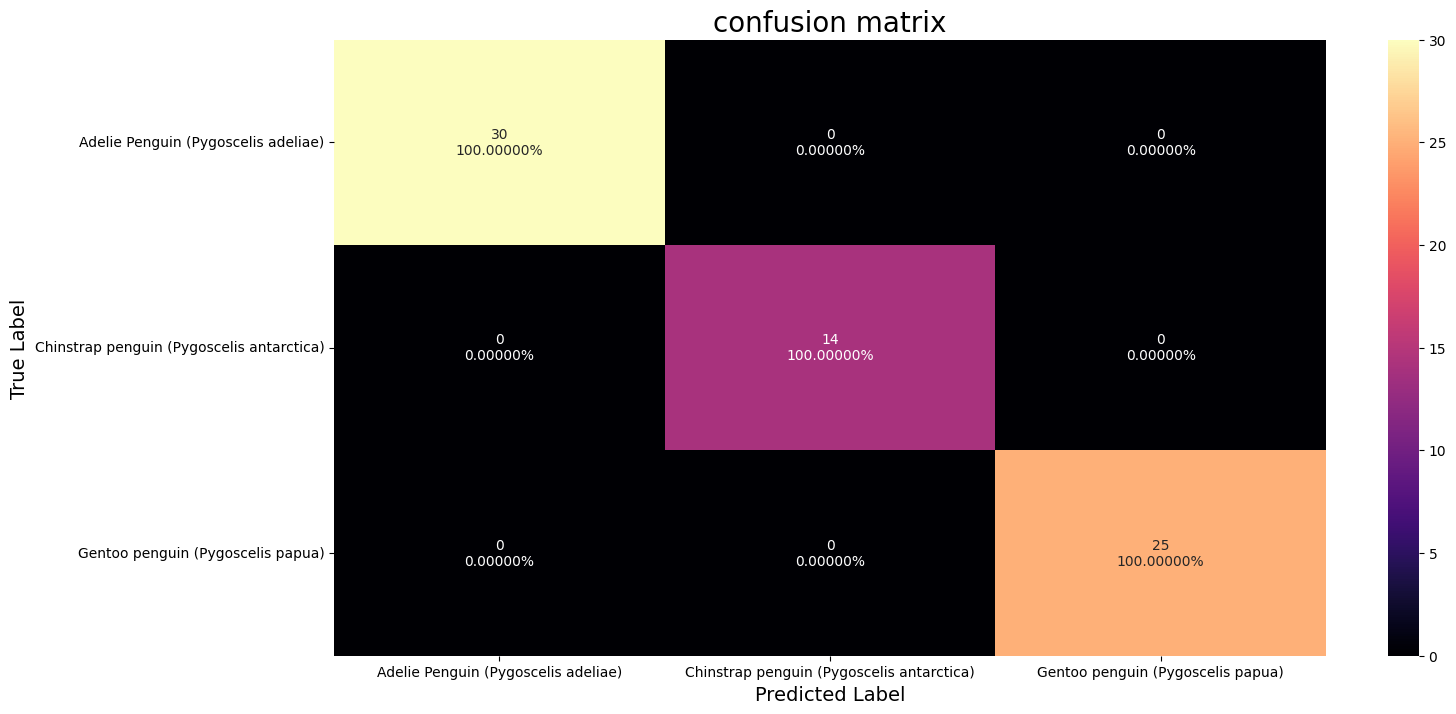

In [62]:
fp.plot_confusion_matrix_report(y_test, y_pred, pallete=plt.cm.magma, class_labels=get_func.classes_)